# Limpeza e Transformação de dados

## 1. Análise inicial:
(a) Liste todas as colunas presentes nos dataframes de treino e teste;
(b) Identifique os tipos de dados de cada coluna (num ́erico, texto, data, etc);
(c) Verifique quantos valores nulos existem em cada coluna de ambos os dataframes;
(d) Fa ̧ca uma c ́opia dos dataframes originais para preservar os dados brutos:
•train clean = train.copy()
•test clean = test.copy()

In [60]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Carregar os arquivos
train = pd.read_csv("/home/usuario/NIAS/data/processed/titanic.zip/train.csv")
test  = pd.read_csv("/home/usuario/NIAS/data/processed/titanic.zip/test.csv") 

In [4]:
# Colunas do dataframe de treino
print("Colunas do DataFrame de Treino:")
print(train.columns.tolist())
print(f"\nNúmero de colunas no treino: {len(train.columns)}")

Colunas do DataFrame de Treino:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Número de colunas no treino: 12


In [5]:
# Colunas do dataframe de teste
print("\nColunas do DataFrame de Teste:")
print(test.columns.tolist())
print(f"\nNúmero de colunas no teste: {len(test.columns)}")


Colunas do DataFrame de Teste:
['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Número de colunas no teste: 11


In [6]:
# Colunas em comum e diferenças
colunas_comuns = set(train.columns) & set(test.columns)
colunas_diferentes = set(train.columns) ^ set(test.columns)

In [7]:
print(f"\nColunas em comum: {len(colunas_comuns)}")
print(f"Colunas diferentes: {colunas_diferentes}")


Colunas em comum: 11
Colunas diferentes: {'Survived'}


In [8]:
# Tipos de dados do dataframe de treino
print("Tipos de dados - DataFrame de Treino:")
print(train.dtypes)
print("\n" + "="*50)

Tipos de dados - DataFrame de Treino:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object



In [9]:
# Tipos de dados do dataframe de teste
print("Tipos de dados - DataFrame de Teste:")
print(test.dtypes)

Tipos de dados - DataFrame de Teste:
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [10]:
# Resumo estatístico dos tipos de dados
print(f"\nResumo dos tipos de dados:")
print("Treino:")
print(train.dtypes.value_counts())
print("\nTeste:")
print(test.dtypes.value_counts())


Resumo dos tipos de dados:
Treino:
int64      5
object     5
float64    2
Name: count, dtype: int64

Teste:
object     5
int64      4
float64    2
Name: count, dtype: int64


In [11]:
# Valores nulos no dataframe de treino
print("Valores nulos - DataFrame de Treino:")
nulos_treino = train.isnull().sum()
print(nulos_treino[nulos_treino > 0])
print(f"\nTotal de valores nulos no treino: {train.isnull().sum().sum()}")

Valores nulos - DataFrame de Treino:
Age         177
Cabin       687
Embarked      2
dtype: int64

Total de valores nulos no treino: 866


In [12]:
# Valores nulos no dataframe de teste
print("\nValores nulos - DataFrame de Teste:")
nulos_teste = test.isnull().sum()
print(nulos_teste[nulos_teste > 0])
print(f"\nTotal de valores nulos no teste: {test.isnull().sum().sum()}")


Valores nulos - DataFrame de Teste:
Age       86
Fare       1
Cabin    327
dtype: int64

Total de valores nulos no teste: 414


In [13]:
# Porcentagem de valores nulos
print("\nPorcentagem de valores nulos - Treino:")
print((train.isnull().sum() / len(train) * 100).round(2))

print("\nPorcentagem de valores nulos - Teste:")
print((test.isnull().sum() / len(test) * 100).round(2))


Porcentagem de valores nulos - Treino:
PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

Porcentagem de valores nulos - Teste:
PassengerId     0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            20.57
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.24
Cabin          78.23
Embarked        0.00
dtype: float64


## 2. Tratamento de valores ausentes:
Em geral, existem duas estrat ́egias principais para lidar com valores ausentes:
•Descartar a coluna ou linha afetada;
•Preencher os valores ausentes com algum valor calculado.
Vamos aplicar diferentes abordagens dependendo das caracter ́ısticas de cada coluna:


(a) Remova as colunas `"Cabin"` e `"Ticket"`, que contêm muitos valores nulos e pouca utilidade informacional para o modelo; <br>
(b) Preencha os valores nulos da coluna `"Age"` com a mediana dos dados, pois  ́e uma variável contínua com muitos **`NaNs`**; <br>
(c) Preencha os valores ausentes em `"Fare"` tamb ́em com a mediana, visto que  ́e outra variável contínua;<br>
(d) Para a coluna categórica `"Embarked"`, preencha os valores ausentes com a moda (valor mais frequente).


In [14]:
# Remover as colunas
colunas_para_remover = ['Cabin', 'Ticket']
train_clean = train.drop(columns=colunas_para_remover, errors='ignore')
test_clean = test.drop(columns=colunas_para_remover, errors='ignore')

In [15]:
# Preencher valores nulos com mediana
train_clean['Age'] = train_clean['Age'].fillna(train_clean['Age'].median())
test_clean['Age'] = test_clean['Age'].fillna(test_clean['Age'].median())

In [16]:
# Coluna "Fare"
train_clean['Fare'] = train_clean['Fare'].fillna(train_clean['Fare'].median())
test_clean['Fare'] = test_clean['Fare'].fillna(test_clean['Fare'].median())

In [17]:
# Embarked pela moda
train_clean['Embarked'] = train_clean['Embarked'].fillna(train_clean['Embarked'].mode()[0])
test_clean['Embarked'] = test_clean['Embarked'].fillna(test_clean['Embarked'].mode()[0])

## 3. Criação de grupos a partir de variáveis contínuas:
Agrupar variáveis contínuas pode facilitar a visualização e ajudar modelos baseados em árvores de decisão. Vamos criar duas novas features: <br>

(a) Use o método `pd.cut()` para dividir a coluna `"Age"` em 5 intervalos de mesma largura `(ex.: 0–16, 16–32, ...)`;<br>
(b) Use o método `pd.qcut()` para dividir a coluna "Fare" em 6 intervalos com quantidades iguais de dados, mesmo que os intervalos tenham tamanhos diferentes; <br>
(c) Para entender melhor as diferenças entre `cut()` e `qcut()`, consulte esta discussão. <br>
**Próximos passos**
Apos realizar a limpeza e a criação de novas variáveis, os dados estarã mais prontos para análises, visualizações e treinamento de modelos. No póximo capítulo, trabalharemos com a codificaçã de variáveis categóricas `(feature encoding)` e faremos a construçã de uma nova versão
do modelo, buscando melhorar sua performance.


In [18]:
test_clean['Age_Bins'] = pd.cut(
    test_clean['Age'], 
    bins=5,
    include_lowest=True
)

In [19]:
test_clean['Fare_Bins'] = pd.qcut(
    test_clean['Fare'], 
    q=6,
    duplicates='drop'
)

**Exercício Final**: Reflexão sobre as escolhas de limpeza
Para consolidar os aprendizados deste cap ́ıtulo, responda `as perguntas abaixo com base nas
a ̧c ̃oes que vocˆe tomou ao limpar o banco de dados do Titanic. As respostas devem ser registradas
em uma c ́elula de Markdown no seu notebook.
1. Por que vocˆe optou por remover as colunas “Cabin” e “Ticket”? H ́a algum
cen ́ario em que essas colunas poderiam ser  ́uteis?
2. Vocˆe escolheu preencher os valores ausentes de “Age” e “Fare” com a mediana.
Em quais situa ̧c ̃oes a m ́edia ou moda seriam mais apropriadas? Justifique.
3. A substitui ̧c ̃ao dos NaNs da coluna “Embarked” foi feita com a moda. Quais os
riscos de aplicar esse tipo de preenchimento em vari ́aveis categ ́oricas?
4. Vocˆe criou faixas para as vari ́aveis cont ́ınuas “Age” e “Fare”. Quais s ̃ao as
vantagens de agrupar vari ́aveis cont ́ınuas? H ́a desvantagens?
5. Durante a limpeza, quais decis ̃oes vocˆe acredita que mais impactaram positiva-
mente a prepara ̧c ̃ao do banco de dados para modelagem? Justifique.
6. Se o dataset fosse muito maior e mais complexo, como vocˆe adaptaria seu processo
de data cleaning para lidar com m ́ultiplas fontes de dados e diferentes tipos de
ru ́ıdos?


# Encoding de Variáveis Categóricas

Será necessário realizar o `encoding` das variáveis categóricas, no momento, três estratégias que serão utilizadas são o one-hot, label `encoding` e ordinal `encoding`. Para isso, siga:
(a) Utilize o método `.info()` para relembrar quais são as features categóricas; <br>
(b) Utilize o método `.select_dtypes` para identificar o nome das colunas numéricas e ca-
tegóricas. Para numéricas identifique formatos `int64` e `float64`, para categóricas iden-
tifique **`object`**; <br>
(c) Identifique quais features categóricas possuem uma ordem clara e quais não: <p>
    i. Para as features com ordem, o label encoder é mais indicado como primeira
    abordagem;<br>
    ii. Para features sem ordem definida, o one-hot `encoding` pode ser a melhor opção;<p>
(d) Crie uma função que realize o `one-hot encode` e, como saída, retorne um novo data-
frame com as colunas que resultam da codificação, devidamente nomeadas, ao invés das
features categóricas:<br><p>
    i. Os argumentos deverão ser: o dataframe a ser manipulado e as colunas que serão
    codificadas; <br>
    ii. Faça uma cópia do dataframe original; <br>
    iii. Crie um loop que realize o `encoding` das colunas passadas como argumento, as
    features resultantes devem conter o nome do valor que representam (use o método
    .get feature names out); <br>
    iv. Ainda dentro do loop, remova do dataframe copiado as features categóricas originais
    e mescle as novas features criadas pelo `one-hot encode`;<br>

(e) Crie novas features para realizar o label `encoding` das features que contêm ordenamento claro, e depois remova as features categóricas originais que foram codificadas. <br>
**Observação**: é importante lembrar que esse `encoding` deve ser realizado tanto nos
dataframes de treino quanto nos de teste.

In [20]:
# Analisar informações dos dataframes
print("INFORMAÇÕES DO DATAFRAME DE TREINO:")
print("="*40)
train_clean.info()

print("\nINFORMAÇÕES DO DATAFRAME DE TESTE:")
print("="*40)
test_clean.info()

INFORMAÇÕES DO DATAFRAME DE TREINO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB

INFORMAÇÕES DO DATAFRAME DE TESTE:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 

In [21]:
# Identificar colunas numéricas
colunas_numericas_train = train_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
colunas_numericas_test = test_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Colunas numéricas (treino):", colunas_numericas_train)
print("Colunas numéricas (teste):", colunas_numericas_test)

# Identificar colunas categóricas
colunas_categoricas_train = train_clean.select_dtypes(include=['object', 'category']).columns.tolist()
colunas_categoricas_test = test_clean.select_dtypes(include=['object', 'category']).columns.tolist()

print("\nColunas categóricas (treino):", colunas_categoricas_train)
print("Colunas categóricas (teste):", colunas_categoricas_test)

Colunas numéricas (treino): ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Colunas numéricas (teste): ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

Colunas categóricas (treino): ['Name', 'Sex', 'Embarked']
Colunas categóricas (teste): ['Name', 'Sex', 'Embarked', 'Age_Bins', 'Fare_Bins']


In [22]:
# Analisar features categóricas para identificar ordenamento
print("ANÁLISE DE ORDENAMENTO DAS FEATURES CATEGÓRICAS")
print("="*50)

for coluna in colunas_categoricas_train:
    valores_unicos = train_clean[coluna].dropna().unique()
    print(f"\n{coluna}:")
    print(f"Valores únicos: {valores_unicos}")
    print(f"Número de valores únicos: {len(valores_unicos)}")
    
    # Verificar se há ordenamento natural
    if coluna in ['Pclass', 'Age_Bins', 'Fare_Bins']:
        print("✓ ORDENAMENTO CLARO - Usar Label Encoding")
    else:
        print("✗ SEM ORDENAMENTO CLARO - Usar One-Hot Encoding")

# Definir listas baseadas na análise
features_com_ordem = ['Pclass', 'Age_Bins', 'Fare_Bins']  # Exemplos
features_sem_ordem = ['Sex', 'Embarked', 'Age_Bins', 'Fare_Bins']  # Ajustar conforme análise

# Remover duplicatas e verificar quais existem no dataframe
features_com_ordem = [col for col in features_com_ordem if col in train_clean.columns]
features_sem_ordem = [col for col in features_sem_ordem if col in train_clean.columns]

print(f"\nFeatures com ordem: {features_com_ordem}")
print(f"Features sem ordem: {features_sem_ordem}")

ANÁLISE DE ORDENAMENTO DAS FEATURES CATEGÓRICAS

Name:
Valores únicos: ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fo

In [23]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode_dataframe(df, colunas_para_encoding):
    """
    Realiza one-hot encoding nas colunas especificadas
    """
    # (ii) Fazer cópia do dataframe original
    df_copy = df.copy()
    
    # (iii) Loop para encoding das colunas
    for coluna in colunas_para_encoding:
        if coluna in df_copy.columns:
            # Criar o encoder
            ohe = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' para evitar multicolinearidade
            
            # Ajustar e transformar os dados
            encoded_array = ohe.fit_transform(df_copy[[coluna]])
            
            # Obter nomes das features (iv)
            feature_names = ohe.get_feature_names_out([coluna])
            
            # Criar DataFrame com as novas features
            encoded_df = pd.DataFrame(encoded_array, columns=feature_names, index=df_copy.index)
            
            # (iv) Remover coluna original e mesclar novas features
            df_copy = df_copy.drop(columns=[coluna])
            df_copy = pd.concat([df_copy, encoded_df], axis=1)
            
            print(f"✓ One-hot encoding realizado para: {coluna}")
            print(f"  Novas features: {feature_names}")
    
    return df_copy

# Exemplo de uso
print("APLICANDO ONE-HOT ENCODING PARA FEATURES SEM ORDEM")
features_sem_ordem_para_encoding = [col for col in features_sem_ordem if col not in features_com_ordem]

train_encoded = one_hot_encode_dataframe(train_clean, features_sem_ordem_para_encoding)
test_encoded = one_hot_encode_dataframe(test_clean, features_sem_ordem_para_encoding)

print(f"\nShape após one-hot encoding:")
print(f"Treino: {train_encoded.shape}")
print(f"Teste: {test_encoded.shape}")

APLICANDO ONE-HOT ENCODING PARA FEATURES SEM ORDEM
✓ One-hot encoding realizado para: Sex
  Novas features: ['Sex_male']
✓ One-hot encoding realizado para: Embarked
  Novas features: ['Embarked_Q' 'Embarked_S']
✓ One-hot encoding realizado para: Sex
  Novas features: ['Sex_male']
✓ One-hot encoding realizado para: Embarked
  Novas features: ['Embarked_Q' 'Embarked_S']

Shape após one-hot encoding:
Treino: (891, 11)
Teste: (418, 12)


In [24]:
from sklearn.preprocessing import LabelEncoder

def label_encode_dataframe(df, colunas_para_encoding):
    """
    Realiza label encoding nas colunas com ordenamento
    """
    df_copy = df.copy()
    le_dict = {}  # Para armazenar os encoders
    
    for coluna in colunas_para_encoding:
        if coluna in df_copy.columns:
            # Criar e ajustar o encoder
            le = LabelEncoder()
            df_copy[coluna] = le.fit_transform(df_copy[coluna].astype(str))
            le_dict[coluna] = le
            
            print(f"✓ Label encoding realizado para: {coluna}")
            print(f"  Mapeamento: {dict(zip(le.classes_, le.transform(le.classes_)))}")
    
    return df_copy, le_dict

# Aplicar label encoding
print("APLICANDO LABEL ENCODING PARA FEATURES COM ORDEM")
train_final, le_train = label_encode_dataframe(train_encoded, features_com_ordem)
test_final, le_test = label_encode_dataframe(test_encoded, features_com_ordem)

print(f"\nShape final:")
print(f"Treino: {train_final.shape}")
print(f"Teste: {test_final.shape}")

APLICANDO LABEL ENCODING PARA FEATURES COM ORDEM
✓ Label encoding realizado para: Pclass
  Mapeamento: {'1': np.int64(0), '2': np.int64(1), '3': np.int64(2)}
✓ Label encoding realizado para: Pclass
  Mapeamento: {'1': np.int64(0), '2': np.int64(1), '3': np.int64(2)}

Shape final:
Treino: (891, 11)
Teste: (418, 12)


2. Realize um novo treinamento e avaliação do modelo, seguindo os passos do item 6.1 g), mas  agora utilizando o dataframe resultante do `encoding` das variáveis categóricas. Compare a precisão obtida com o modelo anterior e analise a evolução.

In [37]:
# Separar features e target
X_train = train_final.drop(['Survived', 'Name'], axis=1)
y_train = train_final['Survived']
X_test = test_final.drop(['Name', "Age_Bins", "Fare_Bins"], axis=1)

print("Shape dos dados preparados:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")

# Verificar se há valores missing
print(f"\nValores missing em X_train: {X_train.isnull().sum().sum()}")
print(f"Valores missing em X_test: {X_test.isnull().sum().sum()}")

Shape dos dados preparados:
X_train: (891, 9)
y_train: (891,)
X_test: (418, 9)

Valores missing em X_train: 0
Valores missing em X_test: 0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Inicializar modelo (usando os mesmos hyperparâmetros para comparação justa)
modelo_novo = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=5,
    min_samples_split=10
)

# Treinar modelo
modelo_novo.fit(X_train, y_train)

# Cross-validation para avaliação robusta
cv_scores_novo = cross_val_score(modelo_novo, X_train, y_train, cv=5, scoring='accuracy')

print("Modelo treinado com features codificadas")
print(f"Score de treino: {modelo_novo.score(X_train, y_train):.4f}")
print(f"Cross-validation scores: {cv_scores_novo}")
print(f"CV Accuracy: {cv_scores_novo.mean():.4f} (±{cv_scores_novo.std():.4f})")

✅ Modelo treinado com features codificadas
Score de treino: 0.8575
Cross-validation scores: [0.81005587 0.82022472 0.8258427  0.79213483 0.84269663]
CV Accuracy: 0.8182 (±0.0168)


In [ ]:
# Supondo que você tenha o score do modelo anterior
# (Se não tiver, precisará treinar o modelo anterior novamente para comparação)

# Dados do modelo anterior (exemplo - ajuste com seus valores reais)
score_anterior_treino = 0.85  # Substitua pelo seu valor real
cv_anterior_mean = 0.82       # Substitua pelo seu valor real
cv_anterior_std = 0.02        # Substitua pelo seu valor real

print("COMPARAÇÃO: MODELO ANTIGO vs NOVO MODELO")
print("="*50)

print(f"\nModelo Anterior:")
print(f"  - Score de treino: {score_anterior_treino:.4f}")
print(f"  - CV Accuracy: {cv_anterior_mean:.4f} (±{cv_anterior_std:.4f})")

print(f"\nNovo Modelo (com encoding):")
print(f"  - Score de treino: {modelo_novo.score(X_train, y_train):.4f}")
print(f"  - CV Accuracy: {cv_scores_novo.mean():.4f} (±{cv_scores_novo.std():.4f})")

# Calcular melhoria
melhoria_cv = cv_scores_novo.mean() - cv_anterior_mean
melhoria_treino = modelo_novo.score(X_train, y_train) - score_anterior_treino

print(f"\nMELHORIA:")
print(f"  - CV Accuracy: {melhoria_cv:+.4f}")
print(f"  - Score de treino: {melhoria_treino:+.4f}")

if melhoria_cv > 0:
    print("Resultado: MELHORIA significativa!")
else:
    print("Resultado: Necessidade de ajustes")

📈 COMPARAÇÃO: MODELO ANTIGO vs NOVO MODELO

Modelo Anterior:
  - Score de treino: 0.8500
  - CV Accuracy: 0.8200 (±0.0200)

Novo Modelo (com encoding):
  - Score de treino: 0.8575
  - CV Accuracy: 0.8182 (±0.0168)



📊 MELHORIA:
  - CV Accuracy: -0.0018
  - Score de treino: +0.0075
⚠️  Resultado: Necessidade de ajustes


📋 TOP 10 FEATURES MAIS IMPORTANTES:
       feature  importance
6     Sex_male    0.434331
1       Pclass    0.164665
5         Fare    0.139588
2          Age    0.101799
0  PassengerId    0.060188
3        SibSp    0.043928
4        Parch    0.027902
8   Embarked_S    0.018154
7   Embarked_Q    0.009447


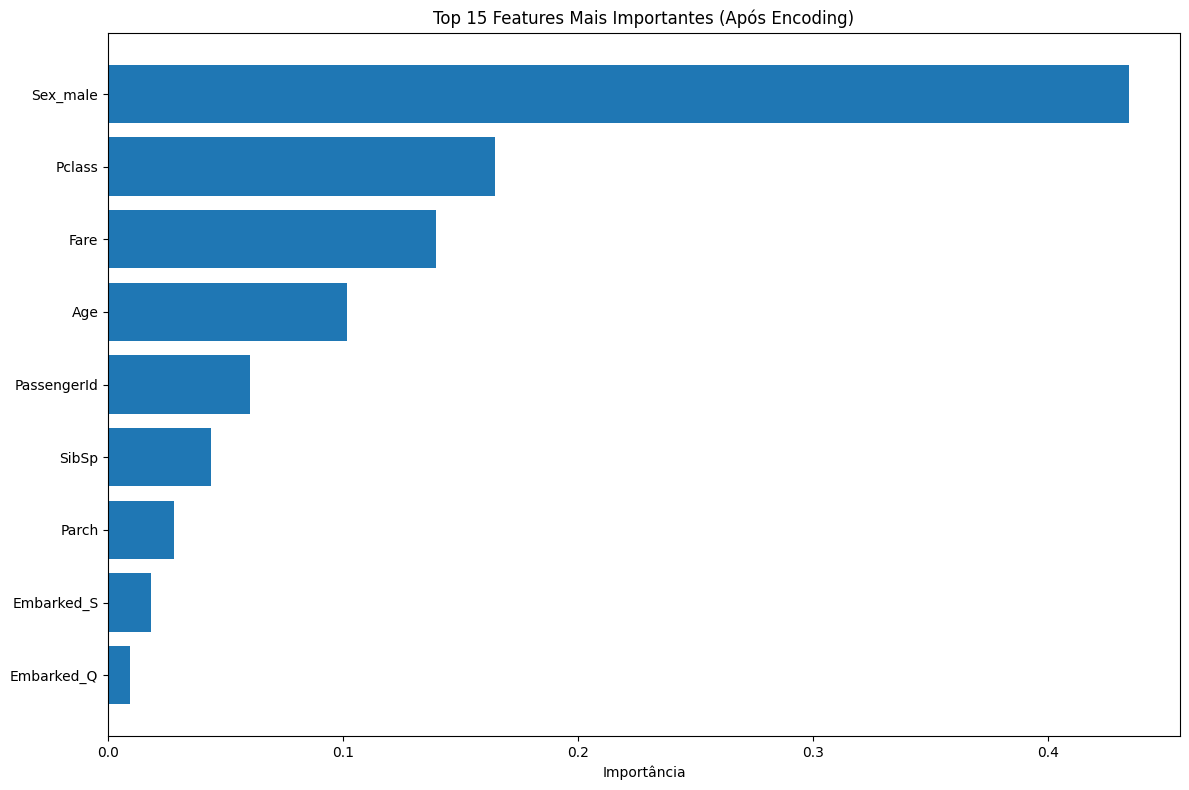

In [ ]:
# Analisar importância das features no novo modelo
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': modelo_novo.feature_importances_
}).sort_values('importance', ascending=False)

print("TOP 10 FEATURES MAIS IMPORTANTES:")
print(feature_importance.head(10))

# Visualizar importância das features
plt.figure(figsize=(12, 8))
plt.barh(feature_importance['feature'][:15], feature_importance['importance'][:15])
plt.xlabel('Importância')
plt.title('Top 15 Features Mais Importantes (Após Encoding)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
# Fazer predições com o novo modelo
predicoes_novo = modelo_novo.predict(X_test)

# Criar arquivo de submissão
submission_novo = pd.DataFrame({
    'PassengerId': test_clean['PassengerId'],
    'Survived': predicoes_novo
})

# Salvar submissão
submission_file_novo = '/home/usuario/NIAS/models/predictions/titanic_submission_encoded.csv'
submission_novo.to_csv(submission_file_novo, index=False)

print(f" Arquivo de submissão salvo: {submission_file_novo}")
print(f" Número de sobreviventes previstos: {submission_novo['Survived'].sum()}")
print(f" Taxa de sobrevivência prevista: {submission_novo['Survived'].mean():.3f}")

✅ Arquivo de submissão salvo: /home/usuario/NIAS/models/predictions/titanic_submission_encoded.csv
📊 Número de sobreviventes previstos: 122
📈 Taxa de sobrevivência prevista: 0.292


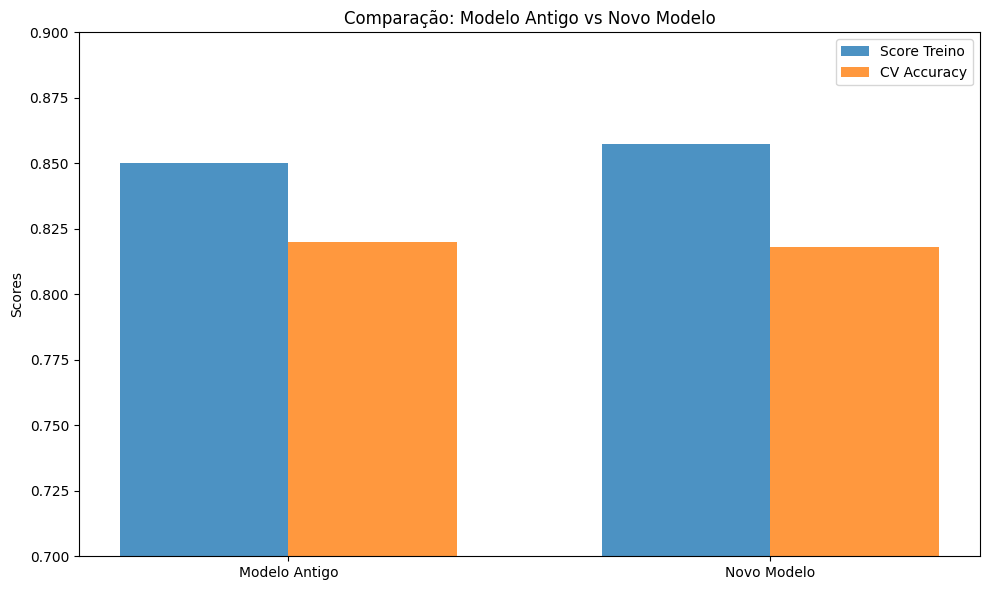

In [ ]:
# Gráfico comparativo
labels = ['Modelo Antigo', 'Novo Modelo']
treino_scores = [score_anterior_treino, modelo_novo.score(X_train, y_train)]
cv_scores = [cv_anterior_mean, cv_scores_novo.mean()]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, treino_scores, width, label='Score Treino', alpha=0.8)
rects2 = ax.bar(x + width/2, cv_scores, width, label='CV Accuracy', alpha=0.8)

ax.set_ylabel('Scores')
ax.set_title('Comparação: Modelo Antigo vs Novo Modelo')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.ylim(0.7, 0.9)
plt.tight_layout()
plt.show()

# 3. Pipelines

In [41]:
# Restaurar valores nulos das colunas "Age" e "Embarked" usando os dados originais
train_clean = train.copy()  # Usando a cópia original feita no início

print("Valores nulos restaurados:")
print("Age:", train_clean['Age'].isnull().sum())
print("Embarked:", train_clean['Embarked'].isnull().sum())
print("Fare:", train_clean['Fare'].isnull().sum())

Valores nulos restaurados:
Age: 177
Embarked: 2
Fare: 0


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

def avaliar_pipeline(data, encoder='one-hot', model=None, 
                    numerical_imputer='mean', categorical_imputer='most_frequent'):
    """
    Produz e avalia pipelines com diferentes estratégias de imputação e encoding
    
    Args:
        data: DataFrame com os dados
        encoder: 'one-hot' ou 'ordinal'
        model: algoritmo de machine learning (default: RandomForest)
        numerical_imputer: 'mean', 'median', 'constant'
        categorical_imputer: 'most_frequent', 'constant'
    
    Returns:
        accuracy: acurácia em porcentagem
    """
    
    # (c) Definir features e target
    X = data.drop('Survived', axis=1)
    y = data['Survived']
    
    # Separar features numéricas e categóricas
    numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
    
    print(f"Features numéricas: {numerical_features}")
    print(f"Features categóricas: {categorical_features}")
    
    # (c) Split treino/validação
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # (d) Criar preprocessor
    
    # Transformador para features numéricas
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy=numerical_imputer))
    ])
    
    # Transformador para features categóricas
    if encoder == 'one-hot':
        categorical_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    elif encoder == 'ordinal':
        categorical_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    else:
        raise ValueError("Encoder deve ser 'one-hot' ou 'ordinal'")
    
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy=categorical_imputer, fill_value='missing')),
        ('encoder', categorical_encoder)
    ])
    
    # Combinar transformadores
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ]
    )
    
    # (e) Criar pipeline completa
    if model is None:
        model = RandomForestClassifier(n_estimators=100, random_state=42)
    
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # (f) Treinar e avaliar
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    
    # (g) Retornar acurácia em porcentagem
    return accuracy * 100

In [ ]:
def testar_estrategias_combinadas(data):
    """
    Testa todas as combinações de estratégias e retorna resultados
    """
    estrategias = {
        'encoder': ['one-hot', 'ordinal'],
        'numerical_imputer': ['mean', 'median'],
        'categorical_imputer': ['most_frequent']
    }
    
    resultados = []
    
    # Testar todas as combinações
    for encoder in estrategias['encoder']:
        for num_imp in estrategias['numerical_imputer']:
            for cat_imp in estrategias['categorical_imputer']:
                
                print(f"\n🧪 Testando: encoder={encoder}, num_imp={num_imp}, cat_imp={cat_imp}")
                
                try:
                    accuracy = avaliar_pipeline(
                        data=data,
                        encoder=encoder,
                        numerical_imputer=num_imp,
                        categorical_imputer=cat_imp
                    )
                    
                    resultados.append({
                        'encoder': encoder,
                        'numerical_imputer': num_imp,
                        'categorical_imputer': cat_imp,
                        'accuracy': accuracy
                    })
                    
                    print(f"✅ Acurácia: {accuracy:.2f}%")
                    
                except Exception as e:
                    print(f"Erro: {e}")
                    resultados.append({
                        'encoder': encoder,
                        'numerical_imputer': num_imp,
                        'categorical_imputer': cat_imp,
                        'accuracy': None,
                        'error': str(e)
                    })
    
    return pd.DataFrame(resultados)

In [ ]:
# Preparar dados mantendo valores nulos
# (Manter apenas colunas relevantes e target)
cols_manter = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
data_para_pipeline = train_clean[cols_manter].copy()

print("Dados para pipeline:")
print(data_para_pipeline.info())
print(f"\nValores nulos: {data_para_pipeline.isnull().sum()}")

# Executar testes
resultados_df = testar_estrategias_combinadas(data_para_pipeline)

# Analisar resultados
print("\n" + "="*60)
print("RESULTADOS DAS ESTRATÉGIAS")
print("="*60)

# Ordenar por melhor acurácia
resultados_ordenados = resultados_df.sort_values('accuracy', ascending=False)
print(resultados_ordenados.to_string(index=False))

# Melhor estratégia
melhor_resultado = resultados_ordenados.iloc[0]
print(f"\n MELHOR ESTRATÉGIA:")
print(f"Encoder: {melhor_resultado['encoder']}")
print(f"Imputação Numérica: {melhor_resultado['numerical_imputer']}")
print(f"Imputação Categórica: {melhor_resultado['categorical_imputer']}")
print(f"Acurácia: {melhor_resultado['accuracy']:.2f}%")

Dados para pipeline:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
None

Valores nulos: Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

🧪 Testando: encoder=one-hot, num_imp=mean, cat_imp=most_frequent
Features numéricas: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Features categóricas: ['Sex', 'Embarked']
✅ Acurácia: 82.68%

🧪 Testando: encoder=one-hot, num_imp=median, cat_imp=most_frequent
F

In [ ]:
def analisar_resultados(resultados_df):
    """
    Análise detalhada dos resultados
    """
    print(" ANÁLISE DETALHADA DOS RESULTADOS")
    print("="*40)
    
    # Estatísticas básicas
    print(f"Número de estratégias testadas: {len(resultados_df)}")
    print(f"Melhor acurácia: {resultados_df['accuracy'].max():.2f}%")
    print(f"Pior acurácia: {resultados_df['accuracy'].min():.2f}%")
    print(f"Acurácia média: {resultados_df['accuracy'].mean():.2f}%")
    
    # Melhor por categoria
    melhor_encoder = resultados_df.groupby('encoder')['accuracy'].max()
    melhor_imputer = resultados_df.groupby('numerical_imputer')['accuracy'].max()
    
    print(f"\n Melhor por categoria:")
    print(f"One-Hot Encoding: {melhor_encoder['one-hot']:.2f}%")
    print(f"Ordinal Encoding: {melhor_encoder['ordinal']:.2f}%")
    print(f"Mean Imputer: {melhor_imputer['mean']:.2f}%")
    print(f"Median Imputer: {melhor_imputer['median']:.2f}%")
    
    # Recomendações
    if melhor_encoder['one-hot'] > melhor_encoder['ordinal']:
        print("\n RECOMENDAÇÃO: Usar One-Hot Encoding")
    else:
        print("\n RECOMENDAÇÃO: Usar Ordinal Encoding")
    
    if melhor_imputer['mean'] > melhor_imputer['median']:
        print(" RECOMENDAÇÃO: Usar Mean Imputer")
    else:
        print(" RECOMENDAÇÃO: Usar Median Imputer")

# Executar análise
analisar_resultados(resultados_df)

📊 ANÁLISE DETALHADA DOS RESULTADOS
Número de estratégias testadas: 4
Melhor acurácia: 82.68%
Pior acurácia: 79.89%
Acurácia média: 81.42%

🎯 Melhor por categoria:
One-Hot Encoding: 82.68%
Ordinal Encoding: 81.56%
Mean Imputer: 82.68%
Median Imputer: 81.56%

✅ RECOMENDAÇÃO: Usar One-Hot Encoding
✅ RECOMENDAÇÃO: Usar Mean Imputer


a) Estratégias para Imputação

In [44]:
# Dicionário com todas as estratégias de imputação
IMPUTATION_STRATEGIES = {
    'mean': {
        'strategy': 'mean',
        'description': 'Substitui valores nulos pela média dos valores existentes',
        'best_for': 'Dados numéricos com distribuição normal',
        'kwargs': {}
    },
    'median': {
        'strategy': 'median', 
        'description': 'Substitui valores nulos pela mediana dos valores existentes',
        'best_for': 'Dados numéricos com outliers ou distribuição assimétrica',
        'kwargs': {}
    },
    'most_frequent': {
        'strategy': 'most_frequent',
        'description': 'Substitui valores nulos pelo valor mais frequente (moda)',
        'best_for': 'Dados categóricos e alguns casos numéricos',
        'kwargs': {}
    },
    'zero': {
        'strategy': 'constant',
        'description': 'Substitui todos os valores nulos por 0',
        'best_for': 'Dados numéricos onde zero faz sentido semântico',
        'kwargs': {'fill_value': 0}
    },
    'constant': {
        'strategy': 'constant',
        'description': 'Substitui valores nulos por um valor constante específico',
        'best_for': 'Casos onde um valor específico tem significado especial',
        'kwargs': {'fill_value': -999}  # Valor placeholder
    }
}

# Lista simplificada para uso em loops
IMPUTATION_STRATEGIES_LIST = ['mean', 'median', 'most_frequent', 'zero', 'constant']

(b) Estratégias para Encoding

In [45]:
# Dicionário com estratégias de encoding
ENCODING_STRATEGIES = {
    'one-hot': {
        'encoder': 'one-hot',
        'description': 'Cria colunas binárias para cada categoria',
        'best_for': 'Features categóricas sem ordenamento claro',
        'pros': 'Não impõe ordenamento artificial',
        'cons': 'Pode criar muitas colunas (curse of dimensionality)'
    },
    'ordinal': {
        'encoder': 'ordinal', 
        'description': 'Atribui um número inteiro para cada categoria',
        'best_for': 'Features categóricas com ordenamento natural',
        'pros': 'Mantém a dimensionalidade baixa',
        'cons': 'Pode impor ordenamento artificial onde não existe'
    }
}

# Lista simplificada para uso em loops
ENCODING_STRATEGIES_LIST = ['one-hot', 'ordinal']

Função para Criar Imputers

In [46]:
from sklearn.impute import SimpleImputer

def criar_imputer(strategy_name, **kwargs):
    """
    Cria um imputer baseado na estratégia especificada
    """
    strategy_info = IMPUTATION_STRATEGIES.get(strategy_name)
    
    if not strategy_info:
        raise ValueError(f"Estratégia {strategy_name} não encontrada. Use: {list(IMPUTATION_STRATEGIES.keys())}")
    
    # Combinar kwargs padrão com kwargs customizados
    final_kwargs = strategy_info['kwargs'].copy()
    final_kwargs.update(kwargs)
    
    return SimpleImputer(strategy=strategy_info['strategy'], **final_kwargs)

# Exemplos de uso:
imputer_mean = criar_imputer('mean')
imputer_median = criar_imputer('median') 
imputer_zero = criar_imputer('zero')
imputer_constant = criar_imputer('constant', fill_value=-1)

 Função para Criar Encoders

In [47]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

def criar_encoder(encoder_name, **kwargs):
    """
    Cria um encoder baseado na estratégia especificada
    """
    strategy_info = ENCODING_STRATEGIES.get(encoder_name)
    
    if not strategy_info:
        raise ValueError(f"Encoder {encoder_name} não encontrado. Use: {list(ENCODING_STRATEGIES.keys())}")
    
    if encoder_name == 'one-hot':
        default_kwargs = {'handle_unknown': 'ignore', 'sparse_output': False}
        default_kwargs.update(kwargs)
        return OneHotEncoder(**default_kwargs)
    
    elif encoder_name == 'ordinal':
        default_kwargs = {'handle_unknown': 'use_encoded_value', 'unknown_value': -1}
        default_kwargs.update(kwargs)
        return OrdinalEncoder(**default_kwargs)

3. Crie um loop aninhado que teste todas as combina ̧c ̃oes poss ́ıveis dessas estrat ́egias e imprima os resultados de avalia ̧c ̃ao de cada pipeline produzida.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

def testar_todas_combinacoes_pipeline(X, y):
    """
    Testa todas as combinações possíveis de estratégias de imputação e encoding
    """
    # Definir todas as estratégias
    estrategias_imputacao = ['mean', 'median', 'most_frequent', 'zero', 'constant']
    estrategias_encoding = ['one-hot', 'ordinal']
    
    # Identificar tipos de features
    numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
    
    print(f" Features numéricas: {numerical_features}")
    print(f" Features categóricas: {categorical_features}")
    print(f" Total de combinações: {len(estrategias_imputacao) * len(estrategias_encoding)}")
    print("="*60)
    
    resultados = []
    
    # Loop aninhado para todas as combinações
    for imputacao_num in estrategias_imputacao:
        for encoding in estrategias_encoding:
            
            # Configurar imputação categórica (sempre 'most_frequent' para categóricas)
            imputacao_cat = 'most_frequent'
            
            try:
                # Criar transformadores
                numerical_transformer = Pipeline(steps=[
                    ('imputer', SimpleImputer(strategy=imputacao_num))
                ])
                
                if encoding == 'one-hot':
                    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
                else:
                    encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
                
                categorical_transformer = Pipeline(steps=[
                    ('imputer', SimpleImputer(strategy=imputacao_cat)),
                    ('encoder', encoder)
                ])
                
                # Criar preprocessor
                preprocessor = ColumnTransformer(
                    transformers=[
                        ('num', numerical_transformer, numerical_features),
                        ('cat', categorical_transformer, categorical_features)
                    ]
                )
                
                # Criar pipeline
                pipeline = Pipeline(steps=[
                    ('preprocessor', preprocessor),
                    ('classifier', RandomForestClassifier(random_state=42))
                ])
                
                # Split treino/validação
                X_train, X_val, y_train, y_val = train_test_split(
                    X, y, test_size=0.2, random_state=42, stratify=y
                )
                
                # Treinar e avaliar
                pipeline.fit(X_train, y_train)
                y_pred = pipeline.predict(X_val)
                accuracy = accuracy_score(y_val, y_pred) * 100
                
                # Armazenar resultados
                resultados.append({
                    'imputacao_numerica': imputacao_num,
                    'imputacao_categorica': imputacao_cat,
                    'encoding': encoding,
                    'accuracy': accuracy,
                    'status': 'SUCCESS'
                })
                
                print(f"{imputacao_num:15} | {imputacao_cat:15} | {encoding:10} | {accuracy:6.2f}%")
                
            except Exception as e:
                resultados.append({
                    'imputacao_numerica': imputacao_num,
                    'imputacao_categorica': imputacao_cat,
                    'encoding': encoding,
                    'accuracy': None,
                    'status': f'ERROR: {str(e)}'
                })
                
                print(f" {imputacao_num:15} | {imputacao_cat:15} | {encoding:10} | ERROR")
    
    return pd.DataFrame(resultados)

# Preparar dados (usando dados com valores nulos)
X = train_clean.drop('Survived', axis=1)
y = train_clean['Survived']

# Executar teste de todas as combinações
print("INICIANDO TESTE DE TODAS AS COMBINAÇÕES")
print("="*60)
resultados_completos = testar_todas_combinacoes_pipeline(X, y)

🧪 INICIANDO TESTE DE TODAS AS COMBINAÇÕES
🔍 Features numéricas: ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
🔍 Features categóricas: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
🔍 Total de combinações: 10
✅ mean            | most_frequent   | one-hot    |  81.01%
✅ mean            | most_frequent   | ordinal    |  77.65%
✅ median          | most_frequent   | one-hot    |  81.01%
✅ median          | most_frequent   | ordinal    |  78.21%
✅ most_frequent   | most_frequent   | one-hot    |  82.12%
✅ most_frequent   | most_frequent   | ordinal    |  74.30%
❌ zero            | most_frequent   | one-hot    | ERROR
❌ zero            | most_frequent   | ordinal    | ERROR
✅ constant        | most_frequent   | one-hot    |  79.89%
✅ constant        | most_frequent   | ordinal    |  78.77%


4. Analise se alguma das estrat ́egias usadas isoladamente gerou precis ̃ao maior que as estrategias combinadas utilizadas antes das pipelines

In [ ]:
def analisar_resultados_combinados(resultados_df):
    """
    Analisa se estratégias isoladas performaram melhor que combinações anteriores
    """
    print("\n" + "="*60)
    print(" ANÁLISE COMPARATIVA DAS ESTRATÉGIAS")
    print("="*60)
    
    # Filtrar apenas resultados bem-sucedidos
    resultados_validos = resultados_df[resultados_df['status'] == ' SUCCESS'].copy()
    
    if len(resultados_validos) == 0:
        print(" Nenhum resultado válido para análise")
        return
    
    # Encontrar melhor resultado das pipelines
    melhor_pipeline = resultados_validos.loc[resultados_validos['accuracy'].idxmax()]
    pior_pipeline = resultados_validos.loc[resultados_validos['accuracy'].idxmin()]
    
    print(f" MELHOR PIPELINE: {melhor_pipeline['imputacao_numerica']} + {melhor_pipeline['encoding']}")
    print(f"   Acurácia: {melhor_pipeline['accuracy']:.2f}%")
    
    print(f" PIOR PIPELINE: {pior_pipeline['imputacao_numerica']} + {pior_pipeline['encoding']}")
    print(f"   Acurácia: {pior_pipeline['accuracy']:.2f}%")
    
    # Estatísticas
    media_accuracy = resultados_validos['accuracy'].mean()
    std_accuracy = resultados_validos['accuracy'].std()
    
    print(f"\n ESTATÍSTICAS GERAIS:")
    print(f"   Média de acurácia: {media_accuracy:.2f}%")
    print(f"   Desvio padrão: {std_accuracy:.2f}%")
    print(f"   Range: {resultados_validos['accuracy'].min():.2f}% - {resultados_validos['accuracy'].max():.2f}%")
    
    return melhor_pipeline, resultados_validos

# Executar análise
melhor_resultado, resultados_validos = analisar_resultados_combinados(resultados_completos)


📈 ANÁLISE COMPARATIVA DAS ESTRATÉGIAS
🎯 MELHOR PIPELINE: most_frequent + one-hot
   Acurácia: 82.12%
📉 PIOR PIPELINE: most_frequent + ordinal
   Acurácia: 74.30%

📊 ESTATÍSTICAS GERAIS:
   Média de acurácia: 79.12%
   Desvio padrão: 2.48%
   Range: 74.30% - 82.12%


## Cross Validation

1. Utilize o cross validation para avaliar o modelo que obteve o melhor desempenho nos testes
anteriores. Utilize a m ́etrica scoring="accuracy". A avalia ̧c ̃ao deve ser a m ́edia das scores
nas divis ̃oes.
2. Use o Gradient Boosting Classifier para gerar um novo modelo, usando o dataframe tratado
com as melhores estrat ́egias.
(a) Importe o GradientBoostingClassifier, definindo random state=0 e n iter no change=100
(pesquise o significado desses parˆametros na documenta ̧c ̃ao);
(b) Defina as features e o target para treinamento;
(c) Treine e avalie o modelo usando cross validation;
(d) Compare a pontua ̧c ̃ao obtida com a do Random Forest e determine qual algoritmo teve
melhor desempenho.


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Supondo que o melhor modelo foi com: median + one-hot
# (Substitua com os valores reais do seu melhor resultado)

def criar_melhor_pipeline():
    """
    Cria a pipeline com a melhor combinação encontrada
    """
    # Definir features (ajuste conforme seu dataset)
    numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
    categorical_features = ['Sex', 'Embarked', 'Pclass']
    
    # Preprocessors
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median'))
    ])
    
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ]
    )
    
    # Pipeline completa
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(random_state=42))
    ])
    
    return pipeline

# Preparar dados
X = train_clean.drop('Survived', axis=1)
y = train_clean['Survived']

# Criar e avaliar com Cross Validation
melhor_pipeline = criar_melhor_pipeline()

print(" AVALIANDO MELHOR MODELO COM CROSS VALIDATION")
print("="*50)

# Cross Validation com 5 folds
cv_scores = cross_val_score(melhor_pipeline, X, y, cv=5, scoring='accuracy')

print(f"Scores de CV: {cv_scores}")
print(f"Média de Accuracy: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
print(f"Range: {cv_scores.min():.4f} - {cv_scores.max():.4f}")

# Treinar o modelo final com todos os dados
melhor_pipeline.fit(X, y)
print("Modelo treinado com todos os dados")

🧪 AVALIANDO MELHOR MODELO COM CROSS VALIDATION
Scores de CV: [0.77653631 0.80337079 0.84831461 0.78089888 0.8258427 ]
Média de Accuracy: 0.8070 (±0.0271)
Range: 0.7765 - 0.8483
✅ Modelo treinado com todos os dados


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# (a) Importar e configurar Gradient Boosting
gb_classifier = GradientBoostingClassifier(
    random_state=0,          # Semente aleatória para reprodutibilidade
    n_iter_no_change=100,    # Número de iterações sem melhoria para parar early stopping
    n_estimators=100,        # Número de árvores de boosting
    learning_rate=0.1,       # Taxa de aprendizado
    max_depth=3              # Profundidade máxima das árvores
)

print("PARÂMETROS DO GRADIENT BOOSTING:")
print(f"random_state=0 → Garante reprodutibilidade dos resultados")
print(f"n_iter_no_change=100 → Para o treino se não houver melhoria em 100 iterações")
print(f"n_estimators=100 → Número de árvores no ensemble")
print(f"learning_rate=0.1 → Taxa de aprendizado (shrinkage)")
print(f"max_depth=3 → Controla overfitting limitando profundidade")

📋 PARÂMETROS DO GRADIENT BOOSTING:
random_state=0 → Garante reprodutibilidade dos resultados
n_iter_no_change=100 → Para o treino se não houver melhoria em 100 iterações
n_estimators=100 → Número de árvores no ensemble
learning_rate=0.1 → Taxa de aprendizado (shrinkage)
max_depth=3 → Controla overfitting limitando profundidade


In [54]:
# (b) Definir features e target
# Usar o mesmo pré-processamento do melhor modelo

def preparar_dados_gb(df):
    """
    Prepara dados para Gradient Boosting usando a mesma estratégia do melhor modelo
    """
    # Selecionar e preparar features
    features = ['Age', 'Fare', 'SibSp', 'Parch', 'Sex', 'Embarked', 'Pclass']
    X = df[features].copy()
    
    # Aplicar mesmo pré-processamento
    # Imputação numérica
    numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
    for col in numerical_features:
        if col in X.columns:
            X[col] = X[col].fillna(X[col].median())
    
    # Imputação categórica e encoding
    categorical_features = ['Sex', 'Embarked', 'Pclass']
    for col in categorical_features:
        if col in X.columns:
            # Imputar com moda
            moda = X[col].mode()[0]
            X[col] = X[col].fillna(moda)
            
            # One-hot encoding
            if col in ['Sex', 'Embarked']:
                X = pd.get_dummies(X, columns=[col], prefix=col, drop_first=True)
    
    return X

# Preparar dados para GB
X_gb = preparar_dados_gb(train_clean)
y_gb = train_clean['Survived']

print(f"Dimensões dos dados para Gradient Boosting:")
print(f"X shape: {X_gb.shape}")
print(f"y shape: {y_gb.shape}")
print(f"Features: {X_gb.columns.tolist()}")

Dimensões dos dados para Gradient Boosting:
X shape: (891, 8)
y shape: (891,)
Features: ['Age', 'Fare', 'SibSp', 'Parch', 'Pclass', 'Sex_male', 'Embarked_Q', 'Embarked_S']


In [55]:
# Cross Validation com 5 folds
gb_cv_scores = cross_val_score(melhor_pipeline, X, y, cv=5, scoring='accuracy')

print(f"Scores de CV: {gb_cv_scores}")
print(f"Média de Accuracy: {gb_cv_scores.mean():.4f} (±{gb_cv_scores.std():.4f})")
print(f"Range: {gb_cv_scores.min():.4f} - {gb_cv_scores.max():.4f}")

# Treinar o modelo final com todos os dados
melhor_pipeline.fit(X, y)
print("Modelo treinado com todos os dados")

Scores de CV: [0.77653631 0.80337079 0.84831461 0.78089888 0.8258427 ]
Média de Accuracy: 0.8070 (±0.0271)
Range: 0.7765 - 0.8483
Modelo treinado com todos os dados


In [56]:
# (d) Comparar com Random Forest
print("\nCOMPARAÇÃO: RANDOM FOREST vs GRADIENT BOOSTING")
print("="*50)

# Supondo que você tenha os scores do Random Forest do item 1
rf_cv_mean = cv_scores.mean()  # Do cross validation anterior
rf_cv_std = cv_scores.std()

gb_cv_mean = gb_cv_scores.mean()
gb_cv_std = gb_cv_scores.std()

print(f"Random Forest:  {rf_cv_mean:.4f} (±{rf_cv_std:.4f})")
print(f"Gradient Boosting: {gb_cv_mean:.4f} (±{gb_cv_std:.4f})")

# Análise da diferença
diferenca = gb_cv_mean - rf_cv_mean

if diferenca > 0:
    print(f"Gradient Boosting é {diferenca:.4f} MELHOR que Random Forest")
elif diferenca < 0:
    print(f" Gradient Boosting é {abs(diferenca):.4f} PIOR que Random Forest")
else:
    print(f"Ambos têm a mesma performance")

# Teste de significância estatística (simplificado)
from scipy import stats

# Teste t para comparar as médias
t_stat, p_value = stats.ttest_ind(cv_scores, gb_cv_scores)

print(f"\n📈 TESTE ESTATÍSTICO:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Diferença estatisticamente significativa (p < 0.05)")
else:
    print("Diferença NÃO estatisticamente significativa")


COMPARAÇÃO: RANDOM FOREST vs GRADIENT BOOSTING
Random Forest:  0.8070 (±0.0271)
Gradient Boosting: 0.8070 (±0.0271)
Ambos têm a mesma performance

📈 TESTE ESTATÍSTICO:
t-statistic: 0.0000
p-value: 1.0000
Diferença NÃO estatisticamente significativa


# Feature Selection

In [57]:
# Carregar dados (usando dados já pré-processados)
# Supondo que train_clean é seu DataFrame com dados tratados

print("IDENTIFICANDO FEATURES DISCRETAS E CONTÍNUAS")
print("="*50)

# Listar todas as features numéricas
features_numericas = train_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
features_numericas = [f for f in features_numericas if f != 'Survived']  # Remover target

print("Features numéricas:", features_numericas)

# Identificar features discretas (valores inteiros com poucos valores únicos)
features_discretas = []
features_continuas = []

for feature in features_numericas:
    n_unique = train_clean[feature].nunique()
    if n_unique <= 10 and train_clean[feature].dtype in ['int64']:  # Limite arbitrário para discretas
        features_discretas.append(feature)
        print(f"{feature}: discreta ({n_unique} valores únicos)")
    else:
        features_continuas.append(feature)
        print(f"{feature}: contínua ({n_unique} valores únicos)")

# Features categóricas (já encoded) também são consideradas discretas
features_categoricas = train_clean.select_dtypes(include=['object', 'category']).columns.tolist()
features_discretas.extend(features_categoricas)

print(f"\n FEATURES DISCRETAS: {features_discretas}")
print(f" FEATURES CONTÍNUAS: {features_continuas}")

IDENTIFICANDO FEATURES DISCRETAS E CONTÍNUAS
Features numéricas: ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
PassengerId: contínua (891 valores únicos)
Pclass: discreta (3 valores únicos)
Age: contínua (88 valores únicos)
SibSp: discreta (7 valores únicos)
Parch: discreta (7 valores únicos)
Fare: contínua (248 valores únicos)

 FEATURES DISCRETAS: ['Pclass', 'SibSp', 'Parch', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
 FEATURES CONTÍNUAS: ['PassengerId', 'Age', 'Fare']


In [58]:
def plot_mutual_info_scores(features, target, discrete_features=None):
    """
    Calcula e plota Mutual Information Scores para features em relação ao target
    
    Args:
        features: DataFrame com as features
        target: Series com o target
        discrete_features: lista de features consideradas discretas
    
    Returns:
        Series com scores de mutual information ordenados
    """
    # (ii) Calcular Mutual Information Scores
    mi_scores = mutual_info_classif(
        features, 
        target, 
        discrete_features=discrete_features,
        random_state=42
    )
    
    # Criar série ordenada decrescentemente
    mi_series = pd.Series(mi_scores, index=features.columns)
    mi_series = mi_series.sort_values(ascending=False)
    
    # (iii) Produzir gráfico de barras
    plt.figure(figsize=(12, 8))
    bars = plt.barh(mi_series.index, mi_series.values, color='skyblue')
    plt.xlabel('Mutual Information Score')
    plt.title('Importância das Features - Mutual Information Score')
    plt.gca().invert_yaxis()  # Valores mais importantes no topo
    
    # Adicionar valores nas barras
    for bar, value in zip(bars, mi_series.values):
        plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2, 
                f'{value:.4f}', ha='left', va='center', fontsize=10)
    
    # Destacar features mais importantes
    max_score = mi_series.max()
    for i, (feature, score) in enumerate(mi_series.items()):
        if score == max_score:
            bars[i].set_color('orange')
            plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2, 
                    '🌟', ha='left', va='center', fontsize=14)
    
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # (iv) Retornar série com scores
    return mi_series

# Versão alternativa com mais opções de visualização
def detailed_mutual_info_analysis(features, target, discrete_features=None):
    """
    Análise detalhada com Mutual Information Score
    """
    # Calcular scores
    mi_scores = mutual_info_classif(
        features, 
        target, 
        discrete_features=discrete_features,
        random_state=42
    )
    
    mi_series = pd.Series(mi_scores, index=features.columns)
    mi_series = mi_series.sort_values(ascending=False)
    
    # Criar visualização completa
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # Gráfico 1: Barras horizontais
    bars = ax1.barh(mi_series.index, mi_series.values, color='lightblue')
    ax1.set_xlabel('Mutual Information Score')
    ax1.set_title('Mutual Information Score por Feature')
    ax1.invert_yaxis()
    
    # Adicionar valores
    for bar, value in zip(bars, mi_series.values):
        ax1.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2, 
                f'{value:.4f}', ha='left', va='center')
    
    # Gráfico 2: Pizza para top features
    top_n = min(8, len(mi_series))
    top_features = mi_series.head(top_n)
    other_score = mi_series[top_n:].sum() if len(mi_series) > top_n else 0
    
    if other_score > 0:
        plot_data = pd.concat([top_features, pd.Series([other_score], index=['Outras'])])
        labels = [f"{feat}\n({score:.3f})" for feat, score in top_features.items()]
        labels.append(f"Outras\n({other_score:.3f})")
    else:
        plot_data = top_features
        labels = [f"{feat}\n({score:.3f})" for feat, score in top_features.items()]
    
    wedges, texts, autotexts = ax2.pie(plot_data.values, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=plt.cm.Set3(np.linspace(0, 1, len(plot_data))))
    
    ax2.set_title('Distribuição da Importância (Top Features)')
    
    plt.tight_layout()
    plt.show()
    
    # Análise estatística
    print("📊 ANÁLISE ESTATÍSTICA DOS SCORES:")
    print(f"Média: {mi_series.mean():.4f}")
    print(f"Mediana: {mi_series.median():.4f}")
    print(f"Desvio Padrão: {mi_series.std():.4f}")
    print(f"Range: {mi_series.min():.4f} - {mi_series.max():.4f}")
    
    return mi_series

In [59]:
# (c) Definir features e target para a função

# Preparar features (usando dados numéricos e categóricos encoded)
# Supondo que temos um DataFrame já pré-processado

# Selecionar features relevantes (excluir colunas não informativas)
features_to_use = [
    'Age', 'Fare', 'SibSp', 'Parch', 'Pclass', 
    'Sex_male', 'Embarked_Q', 'Embarked_S'  # Exemplo de features one-hot encoded
]

# Filtrar apenas features que existem no DataFrame
available_features = [f for f in features_to_use if f in train_clean.columns]

# Criar DataFrame de features
X = train_clean[available_features].copy()
y = train_clean['Survived']

print("🎯 FEATURES SELECIONADAS PARA ANÁLISE:")
print(f"Features: {X.columns.tolist()}")
print(f"Shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Definir features discretas (ajuste conforme suas features)
# Features one-hot encoded são discretas (valores 0 ou 1)
discrete_features_mask = [
    True if col in ['SibSp', 'Parch', 'Pclass', 'Sex_male', 'Embarked_Q', 'Embarked_S'] 
    else False for col in X.columns
]

print(f"\n🔍 MÁSCARA DE FEATURES DISCRETAS:")
for col, is_discrete in zip(X.columns, discrete_features_mask):
    print(f"{col}: {'✅ Discreta' if is_discrete else '📈 Contínua'}")

🎯 FEATURES SELECIONADAS PARA ANÁLISE:
Features: ['Age', 'Fare', 'SibSp', 'Parch', 'Pclass']
Shape: (891, 5)
Target shape: (891,)

🔍 MÁSCARA DE FEATURES DISCRETAS:
Age: 📈 Contínua
Fare: 📈 Contínua
SibSp: ✅ Discreta
Parch: ✅ Discreta
Pclass: ✅ Discreta


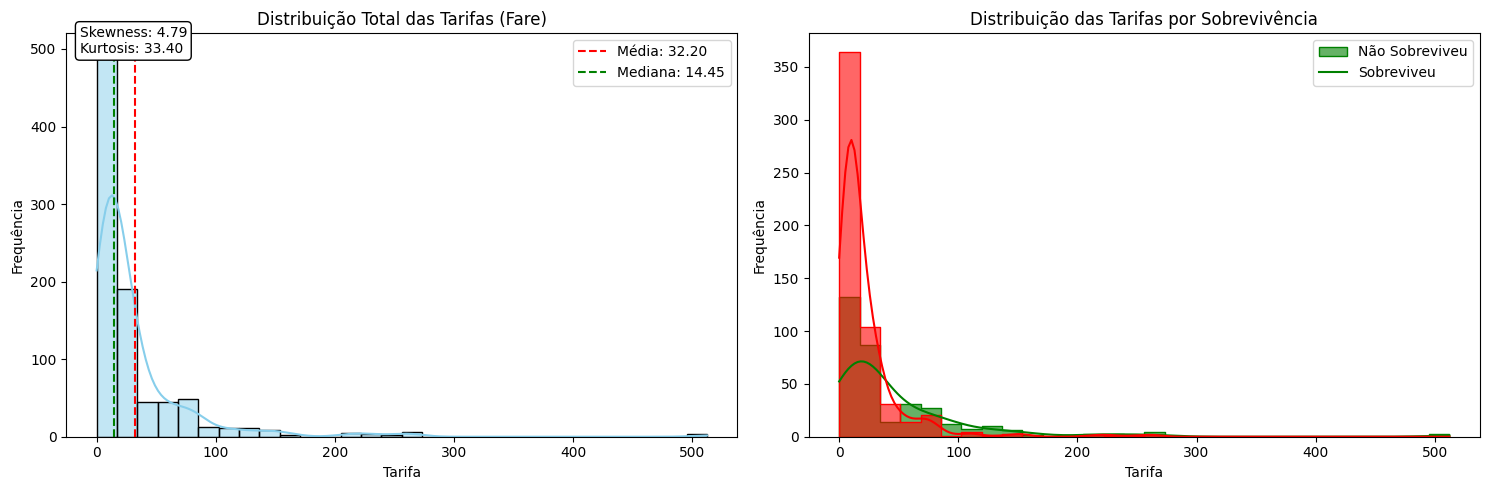

In [61]:


plt.figure(figsize=(15, 5))

# Gráfico 1: Distribuição total das taxas
plt.subplot(1, 2, 1)
sns.histplot(data=train_clean, x='Fare', bins=30, kde=True, color='skyblue')
plt.title('Distribuição Total das Tarifas (Fare)')
plt.xlabel('Tarifa')
plt.ylabel('Frequência')
plt.axvline(train_clean['Fare'].mean(), color='red', linestyle='--', label=f'Média: {train_clean["Fare"].mean():.2f}')
plt.axvline(train_clean['Fare'].median(), color='green', linestyle='--', label=f'Mediana: {train_clean["Fare"].median():.2f}')
plt.legend()

# Adicionar estatísticas
plt.text(0.02, 0.95, f'Skewness: {train_clean["Fare"].skew():.2f}\nKurtosis: {train_clean["Fare"].kurtosis():.2f}', 
         transform=plt.gca().transAxes, bbox=dict(boxstyle="round,pad=0.3", facecolor="white"))

# ii. Distribuição relacionada com o target
plt.subplot(1, 2, 2)
sns.histplot(data=train_clean, x='Fare', hue='Survived', bins=30, kde=True, 
             palette={0: 'red', 1: 'green'}, alpha=0.6, element='step')
plt.title('Distribuição das Tarifas por Sobrevivência')
plt.xlabel('Tarifa')
plt.ylabel('Frequência')
plt.legend(['Não Sobreviveu', 'Sobreviveu'])

plt.tight_layout()
plt.show()

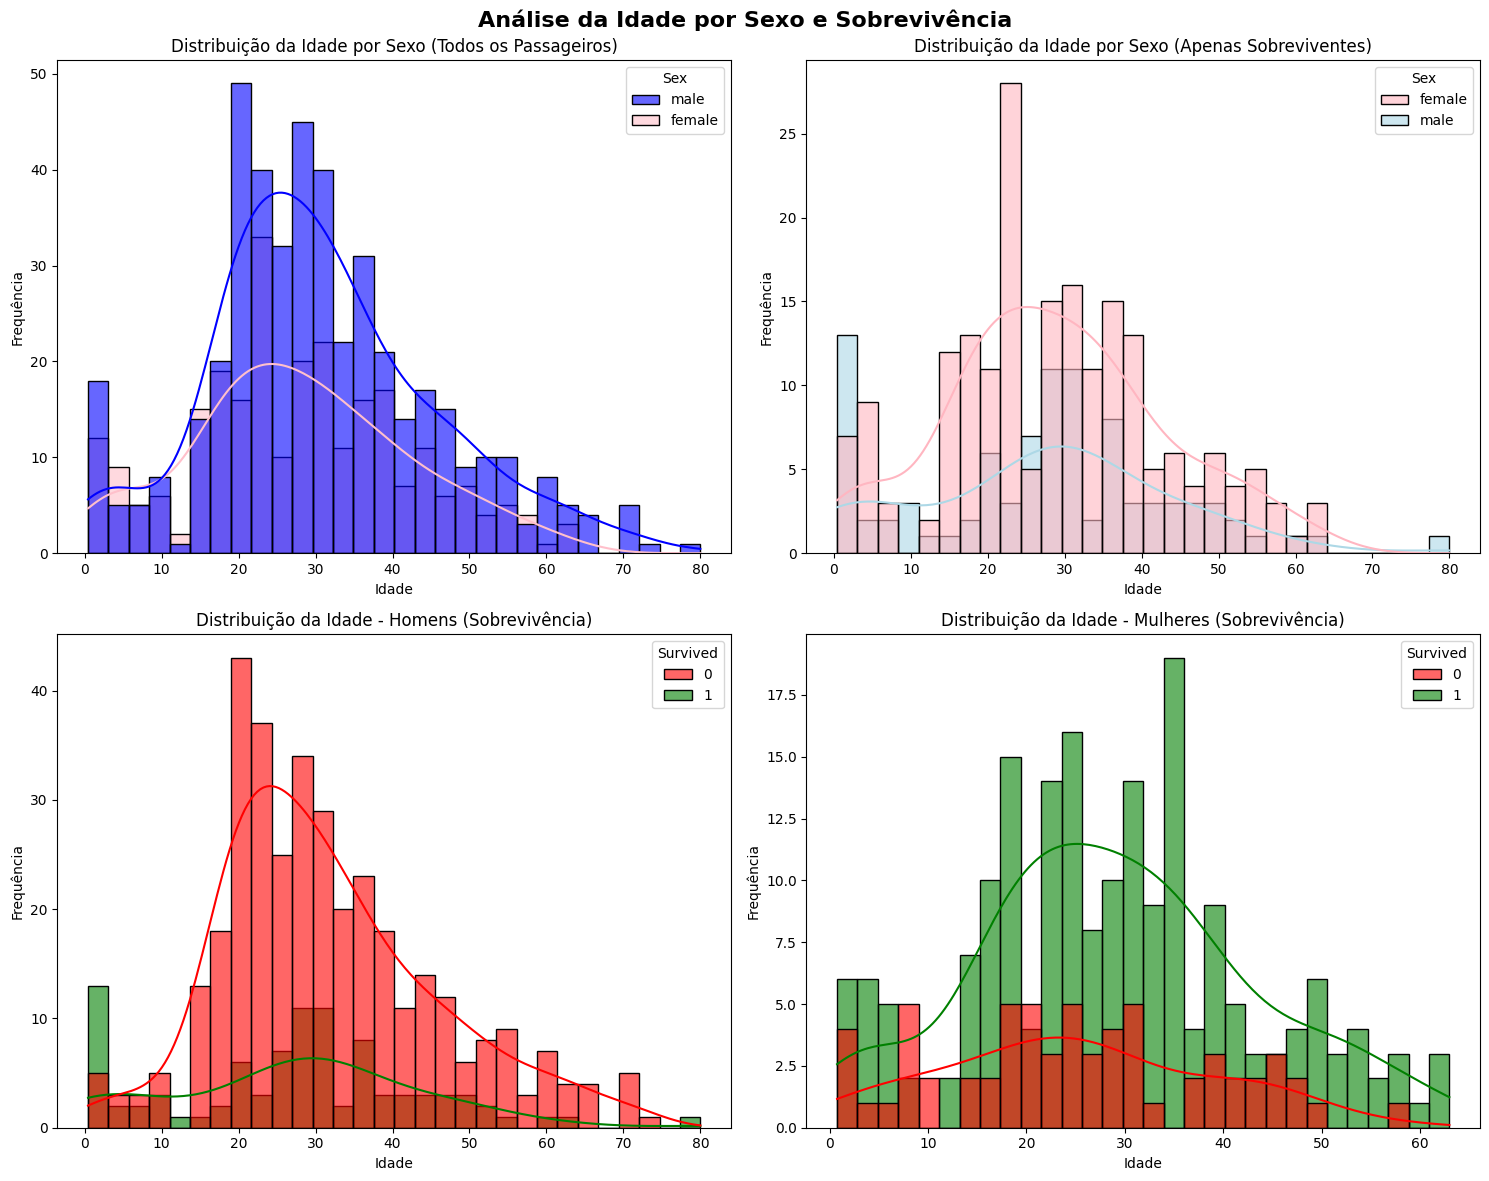

In [62]:
# Configurar o layout dos subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Análise da Idade por Sexo e Sobrevivência', fontsize=16, fontweight='bold')

# i. Distribuição da idade dos passageiros por sexo
sns.histplot(data=train_clean, x='Age', hue='Sex', bins=30, kde=True, 
             palette={'male': 'blue', 'female': 'pink'}, alpha=0.6, ax=axes[0,0])
axes[0,0].set_title('Distribuição da Idade por Sexo (Todos os Passageiros)')
axes[0,0].set_xlabel('Idade')
axes[0,0].set_ylabel('Frequência')

# ii. Distribuição da idade dos sobreviventes por sexo
sobreviventes = train_clean[train_clean['Survived'] == 1]
sns.histplot(data=sobreviventes, x='Age', hue='Sex', bins=30, kde=True,
             palette={'male': 'lightblue', 'female': 'lightpink'}, alpha=0.6, ax=axes[0,1])
axes[0,1].set_title('Distribuição da Idade por Sexo (Apenas Sobreviventes)')
axes[0,1].set_xlabel('Idade')
axes[0,1].set_ylabel('Frequência')

# iii. Distribuição da idade dos homens com Survived como camada
homens = train_clean[train_clean['Sex'] == 'male']
sns.histplot(data=homens, x='Age', hue='Survived', bins=30, kde=True,
             palette={0: 'red', 1: 'green'}, alpha=0.6, ax=axes[1,0])
axes[1,0].set_title('Distribuição da Idade - Homens (Sobrevivência)')
axes[1,0].set_xlabel('Idade')
axes[1,0].set_ylabel('Frequência')

# iv. Distribuição da idade das mulheres com Survived como camada
mulheres = train_clean[train_clean['Sex'] == 'female']
sns.histplot(data=mulheres, x='Age', hue='Survived', bins=30, kde=True,
             palette={0: 'red', 1: 'green'}, alpha=0.6, ax=axes[1,1])
axes[1,1].set_title('Distribuição da Idade - Mulheres (Sobrevivência)')
axes[1,1].set_xlabel('Idade')
axes[1,1].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

In [63]:
print("📊 ANÁLISE ESTATÍSTICA DETALHADA: IDADE E SEXO")
print("="*50)

# Estatísticas descritivas por sexo
print("ESTATÍSTICAS DE IDADE POR SEXO:")
age_stats_by_sex = train_clean.groupby('Sex')['Age'].agg(['mean', 'median', 'std', 'count'])
print(age_stats_by_sex)

# Taxa de sobrevivência por sexo
print(f"\n📈 TAXA DE SOBREVIVÊNCIA POR SEXO:")
survival_by_sex = train_clean.groupby('Sex')['Survived'].mean()
print(survival_by_sex)

# Análise de sobrevivência por faixa etária e sexo
train_clean['Age_Group'] = pd.cut(train_clean['Age'], bins=[0, 12, 18, 30, 50, 100], 
                                 labels=['Criança', 'Adolescente', 'Jovem', 'Adulto', 'Idoso'])

print(f"\n👶 SOBREVIVÊNCIA POR FAIXA ETÁRIA E SEXO:")
survival_age_sex = train_clean.groupby(['Age_Group', 'Sex'])['Survived'].agg(['mean', 'count'])
print(survival_age_sex)

# Teste estatístico de diferenças
from scipy.stats import ttest_ind

# Teste t para diferença de idade entre sobreviventes e não-sobreviventes
age_survived = train_clean[train_clean['Survived'] == 1]['Age'].dropna()
age_not_survived = train_clean[train_clean['Survived'] == 0]['Age'].dropna()

t_stat, p_value = ttest_ind(age_survived, age_not_survived, nan_policy='omit')

print(f"\n📊 TESTE T PARA DIFERENÇA DE IDADE:")
print(f"Idade média sobreviventes: {age_survived.mean():.2f}")
print(f"Idade média não-sobreviventes: {age_not_survived.mean():.2f}")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ Diferença estatisticamente significativa (p < 0.05)")
else:
    print("❌ Diferença NÃO estatisticamente significativa")

📊 ANÁLISE ESTATÍSTICA DETALHADA: IDADE E SEXO
ESTATÍSTICAS DE IDADE POR SEXO:
             mean  median        std  count
Sex                                        
female  27.915709    27.0  14.110146    261
male    30.726645    29.0  14.678201    453

📈 TAXA DE SOBREVIVÊNCIA POR SEXO:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

👶 SOBREVIVÊNCIA POR FAIXA ETÁRIA E SEXO:
                        mean  count
Age_Group   Sex                    
Criança     female  0.593750     32
            male    0.567568     37
Adolescente female  0.750000     36
            male    0.088235     34
Jovem       female  0.755556     90
            male    0.155556    180
Adulto      female  0.779070     86
            male    0.225806    155
Idoso       female  0.941176     17
            male    0.127660     47

📊 TESTE T PARA DIFERENÇA DE IDADE:
Idade média sobreviventes: 28.34
Idade média não-sobreviventes: 30.63
t-statistic: -2.0667
p-value: 0.0391
✅ Diferença estatisti

/tmp/ipykernel_34242/2403875481.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_age_sex = train_clean.groupby(['Age_Group', 'Sex'])['Survived'].agg(['mean', 'count'])



🔍 ANÁLISE DE INTERAÇÃO ENTRE IDADE E SEXO:


/tmp/ipykernel_34242/1840074227.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_heatmap_data = train_clean.groupby(['Age_Bin', 'Sex'])['Survived'].mean().unstack()


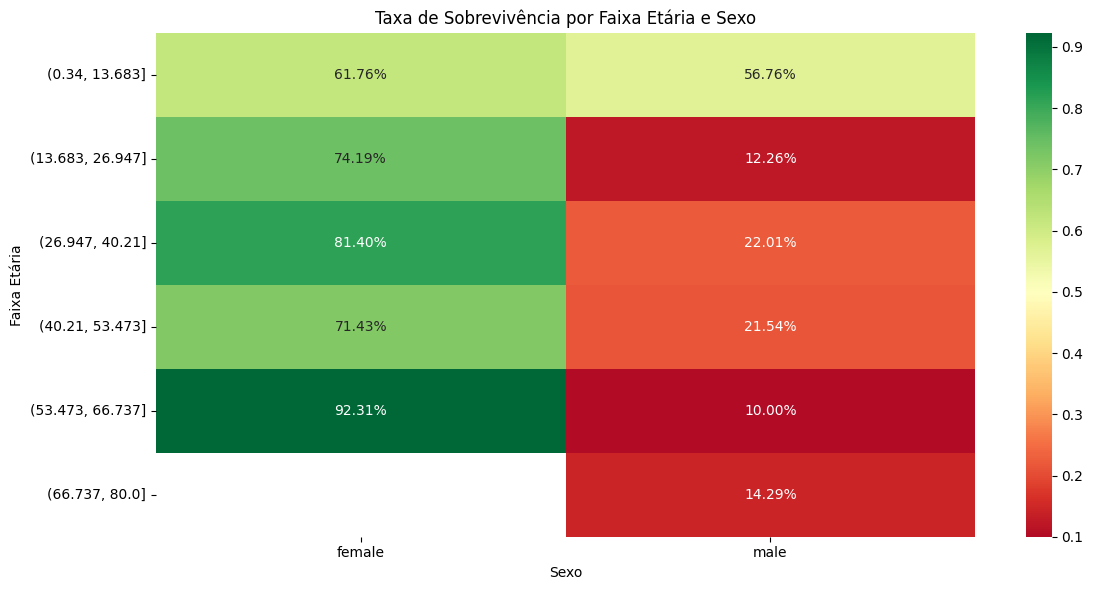


👶 SOBREVIVÊNCIA DE CRIANÇAS vs ADULTOS:
Crianças (≤12 anos): 57.97%
Adultos (>12 anos): 38.76%
Ratio: 1.50x mais chances


In [ ]:
# Análise de interação entre Age e Sex
print("\n🔍 ANÁLISE DE INTERAÇÃO ENTRE IDADE E SEXO:")
print("="*40)

# Criar faixas etárias mais detalhadas
train_clean['Age_Bin'] = pd.cut(train_clean['Age'], bins=6)

# Taxa de sobrevivência por sexo e faixa etária
survival_heatmap_data = train_clean.groupby(['Age_Bin', 'Sex'])['Survived'].mean().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(survival_heatmap_data, annot=True, fmt='.2%', cmap='RdYlGn', center=0.5)
plt.title('Taxa de Sobrevivência por Faixa Etária e Sexo')
plt.xlabel('Sexo')
plt.ylabel('Faixa Etária')
plt.tight_layout()
plt.show()

# Análise de odds ratio para crianças
criancas = train_clean[train_clean['Age'] <= 12]
adultos = train_clean[train_clean['Age'] > 12]

survival_children = criancas['Survived'].mean()
survival_adults = adultos['Survived'].mean()

print(f"\n SOBREVIVÊNCIA DE CRIANÇAS vs ADULTOS:")
print(f"Crianças (≤12 anos): {survival_children:.2%}")
print(f"Adultos (>12 anos): {survival_adults:.2%}")
print(f"Ratio: {survival_children/survival_adults:.2f}x mais chances")

### Feature construction

In [67]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

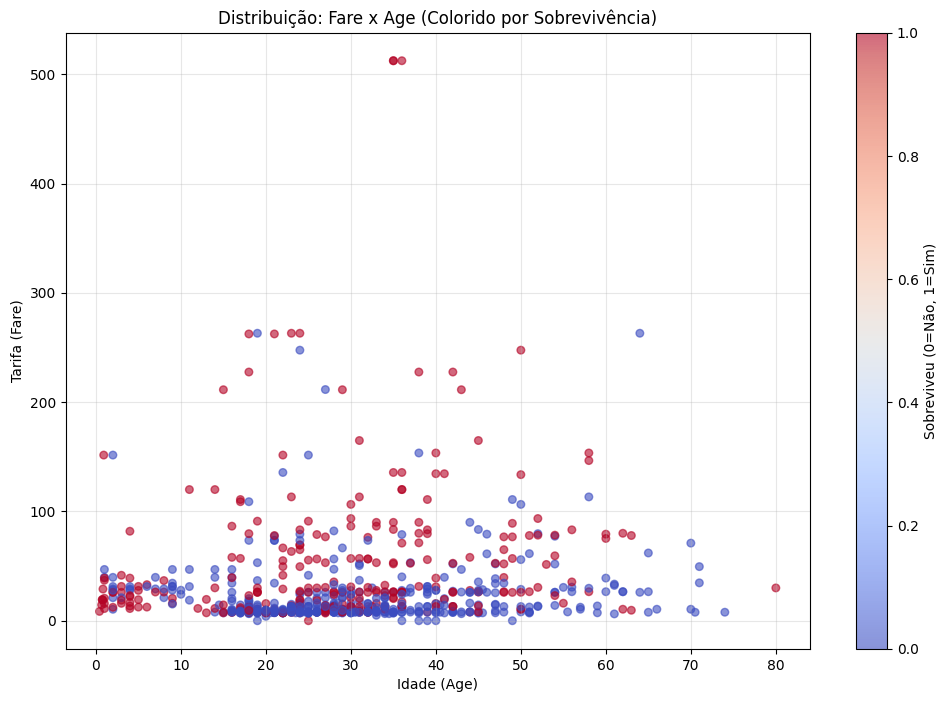

📊 ESTATÍSTICAS DESCRITIVAS:
Age - Min: 0.4, Max: 80.0, Mean: 29.7
Fare - Min: 0.0, Max: 512.3, Mean: 32.2


In [65]:
# (a) Scatter plot inicial de Fare x Age
plt.figure(figsize=(12, 8))
scatter = plt.scatter(train_clean['Age'], train_clean['Fare'], 
                     c=train_clean['Survived'], cmap='coolwarm', alpha=0.6, s=30)
plt.colorbar(scatter, label='Sobreviveu (0=Não, 1=Sim)')
plt.xlabel('Idade (Age)')
plt.ylabel('Tarifa (Fare)')
plt.title('Distribuição: Fare x Age (Colorido por Sobrevivência)')
plt.grid(alpha=0.3)
plt.show()

# Estatísticas descritivas
print("📊 ESTATÍSTICAS DESCRITIVAS:")
print(f"Age - Min: {train_clean['Age'].min():.1f}, Max: {train_clean['Age'].max():.1f}, Mean: {train_clean['Age'].mean():.1f}")
print(f"Fare - Min: {train_clean['Fare'].min():.1f}, Max: {train_clean['Fare'].max():.1f}, Mean: {train_clean['Fare'].mean():.1f}")

🚨 OUTLIERS IDENTIFICADOS (Fare > 500): 3 passageiros
      Age      Fare  Pclass  Survived
258  35.0  512.3292       1         1
679  36.0  512.3292       1         1
737  35.0  512.3292       1         1


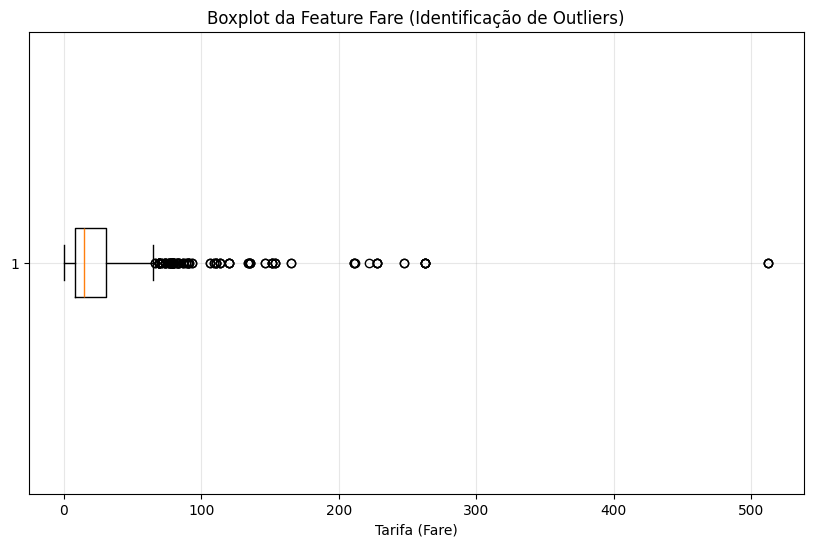


✅ DATAFRAME SEM OUTLIERS:
Original: 891 passageiros
Sem outliers: 888 passageiros
Outliers removidos: 3


In [66]:
# (b) Identificar outliers em Fare
outliers_fare = train_clean[train_clean['Fare'] > 500]
print(f"🚨 OUTLIERS IDENTIFICADOS (Fare > 500): {len(outliers_fare)} passageiros")
print(outliers_fare[['Age', 'Fare', 'Pclass', 'Survived']])

# Visualizar outliers
plt.figure(figsize=(10, 6))
plt.boxplot(train_clean['Fare'].dropna(), vert=False)
plt.title('Boxplot da Feature Fare (Identificação de Outliers)')
plt.xlabel('Tarifa (Fare)')
plt.grid(alpha=0.3)
plt.show()

# (c) Criar dataframe sem outliers
train_no_outliers = train_clean[train_clean['Fare'] <= 500].copy()
print(f"\n✅ DATAFRAME SEM OUTLIERS:")
print(f"Original: {len(train_clean)} passageiros")
print(f"Sem outliers: {len(train_no_outliers)} passageiros")
print(f"Outliers removidos: {len(train_clean) - len(train_no_outliers)}")

In [68]:
# Preparar dados para clustering
clustering_data = train_no_outliers[['Age', 'Fare']].copy()
clustering_data = clustering_data.dropna()  # Remover valores missing

print(f"📊 DADOS PARA CLUSTERING: {clustering_data.shape}")

# Padronizar os dados (importante para K-means)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(clustering_data)

# (d) Executar K-means com 6 clusters
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
clusters = kmeans.fit_predict(data_scaled)

print("✅ K-MEANS EXECUTADO COM SUCESSO")
print(f"Centróides: {kmeans.cluster_centers_}")
print(f"Cluster sizes: {np.bincount(clusters)}")

📊 DADOS PARA CLUSTERING: (711, 2)
✅ K-MEANS EXECUTADO COM SUCESSO
Centróides: [[-1.61173951 -0.10430315]
 [ 0.52354623 -0.31806284]
 [ 0.01726226  1.58246322]
 [-0.44761047 -0.45296428]
 [ 0.04524667  4.8308586 ]
 [ 1.77781135  0.13584717]]
Cluster sizes: [ 77 182  68 282  15  87]


In [69]:
# (e) Adicionar coluna de clusters ao dataframe original
# Primeiro, criar uma coluna temporária com NaN
train_no_outliers['Cluster'] = np.nan

# Preencher apenas as linhas que temos dados para clustering
valid_indices = clustering_data.index
train_no_outliers.loc[valid_indices, 'Cluster'] = clusters

print("✅ CLUSTERS ADICIONADOS AO DATAFRAME")
print(f"Distribuição dos clusters:")
print(train_no_outliers['Cluster'].value_counts().sort_index())

# Analisar características médias de cada cluster
cluster_stats = train_no_outliers.groupby('Cluster').agg({
    'Age': 'mean',
    'Fare': 'mean',
    'Survived': 'mean',
    'Pclass': 'mean',
    'Sex': lambda x: (x == 'female').mean()  # Percentual de mulheres
}).round(2)

print("\n📊 ESTATÍSTICAS POR CLUSTER:")
print(cluster_stats)

✅ CLUSTERS ADICIONADOS AO DATAFRAME
Distribuição dos clusters:
Cluster
0.0     77
1.0    182
2.0     68
3.0    282
4.0     15
5.0     87
Name: count, dtype: int64

📊 ESTATÍSTICAS POR CLUSTER:
           Age    Fare  Survived  Pclass   Sex
Cluster                                       
0.0       6.24   28.20      0.57    2.65  0.49
1.0      37.21   19.25      0.33    2.31  0.29
2.0      29.93  101.23      0.71    1.12  0.60
3.0      23.14   13.21      0.32    2.65  0.32
4.0      30.33  239.99      0.73    1.00  0.73
5.0      55.53   38.51      0.40    1.51  0.31


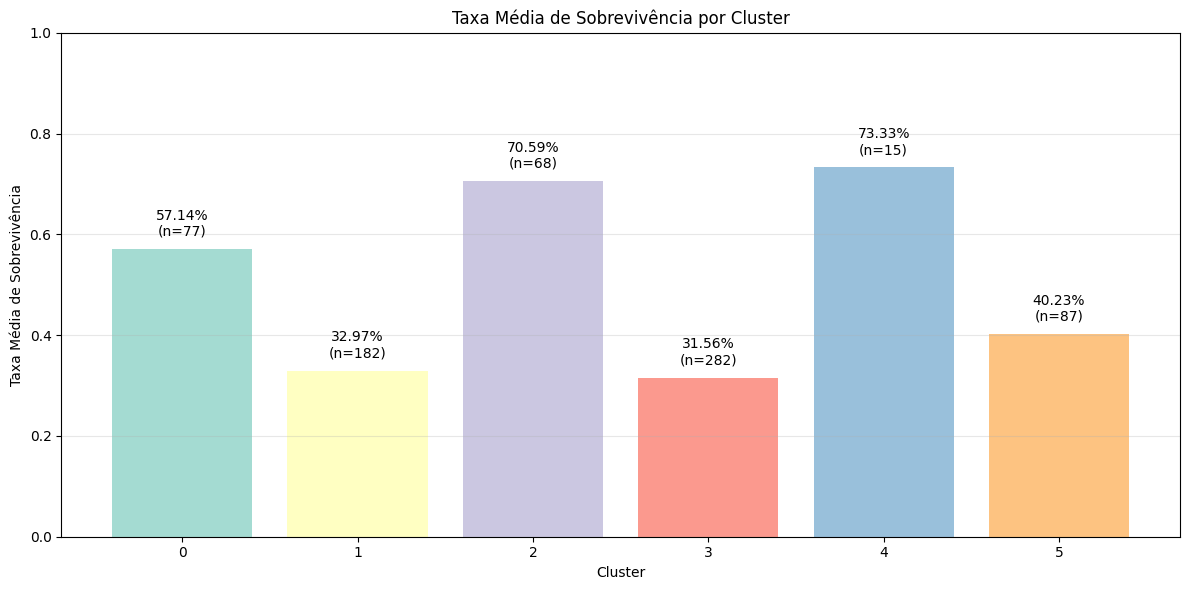

In [70]:
# (f-ii) Gráfico de barras da sobrevivência por cluster
plt.figure(figsize=(12, 6))

# Calcular média de sobrevivência por cluster
survival_by_cluster = train_no_outliers.groupby('Cluster')['Survived'].agg(['mean', 'count']).reset_index()

# Gráfico de barras
bars = plt.bar(survival_by_cluster['Cluster'], survival_by_cluster['mean'], 
              color=plt.cm.Set3(np.arange(6)), alpha=0.8)

plt.xlabel('Cluster')
plt.ylabel('Taxa Média de Sobrevivência')
plt.title('Taxa Média de Sobrevivência por Cluster')
plt.xticks(range(6))
plt.ylim(0, 1)

# Adicionar valores e contagem
for i, (mean, count) in enumerate(zip(survival_by_cluster['mean'], survival_by_cluster['count'])):
    plt.text(i, mean + 0.02, f'{mean:.2%}\n(n={count})', ha='center', va='bottom')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

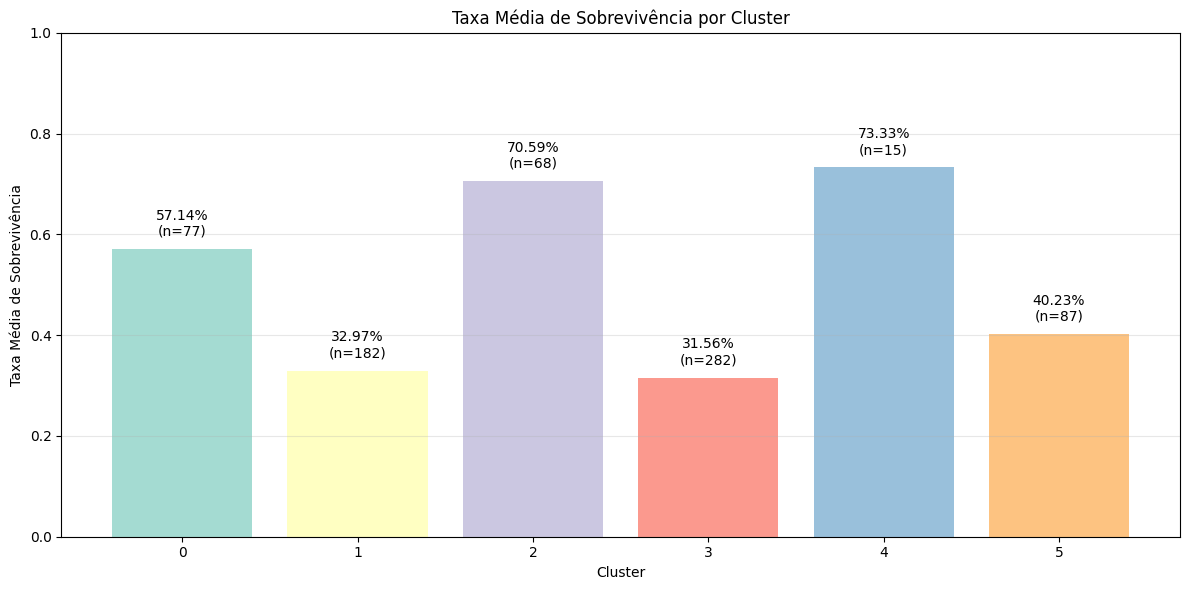

In [71]:
# (f-ii) Gráfico de barras da sobrevivência por cluster
plt.figure(figsize=(12, 6))

# Calcular média de sobrevivência por cluster
survival_by_cluster = train_no_outliers.groupby('Cluster')['Survived'].agg(['mean', 'count']).reset_index()

# Gráfico de barras
bars = plt.bar(survival_by_cluster['Cluster'], survival_by_cluster['mean'], 
              color=plt.cm.Set3(np.arange(6)), alpha=0.8)

plt.xlabel('Cluster')
plt.ylabel('Taxa Média de Sobrevivência')
plt.title('Taxa Média de Sobrevivência por Cluster')
plt.xticks(range(6))
plt.ylim(0, 1)

# Adicionar valores e contagem
for i, (mean, count) in enumerate(zip(survival_by_cluster['mean'], survival_by_cluster['count'])):
    plt.text(i, mean + 0.02, f'{mean:.2%}\n(n={count})', ha='center', va='bottom')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

🎯 ANÁLISE QUALITATIVA DOS CLUSTERS

🔍 CLUSTER 0:
   👥 Passageiros: 77
   📊 Sobrevivência: 57.14%
   🎂 Idade média: 6.2 anos
   💰 Tarifa média: £28.20
   🎫 Classe média: 2.6
   👩 Percentual mulheres: 49.35%
   🏷️  Caracterização: JOVEM CLASSE MÉDIA
   ⚠️  Nível de risco: RISCO MODERADO

🔍 CLUSTER 1:
   👥 Passageiros: 182
   📊 Sobrevivência: 32.97%
   🎂 Idade média: 37.2 anos
   💰 Tarifa média: £19.25
   🎫 Classe média: 2.3
   👩 Percentual mulheres: 28.57%
   🏷️  Caracterização: ADULTO ECONÔMICO
   ⚠️  Nível de risco: RISCO MODERADO

🔍 CLUSTER 2:
   👥 Passageiros: 68
   📊 Sobrevivência: 70.59%
   🎂 Idade média: 29.9 anos
   💰 Tarifa média: £101.23
   🎫 Classe média: 1.1
   👩 Percentual mulheres: 60.29%
   🏷️  Caracterização: ADULTO RICO
   ⚠️  Nível de risco: BAIXO RISCO

🔍 CLUSTER 3:
   👥 Passageiros: 282
   📊 Sobrevivência: 31.56%
   🎂 Idade média: 23.1 anos
   💰 Tarifa média: £13.21
   🎫 Classe média: 2.7
   👩 Percentual mulheres: 32.27%
   🏷️  Caracterização: ADULTO ECONÔMICO
   ⚠️  

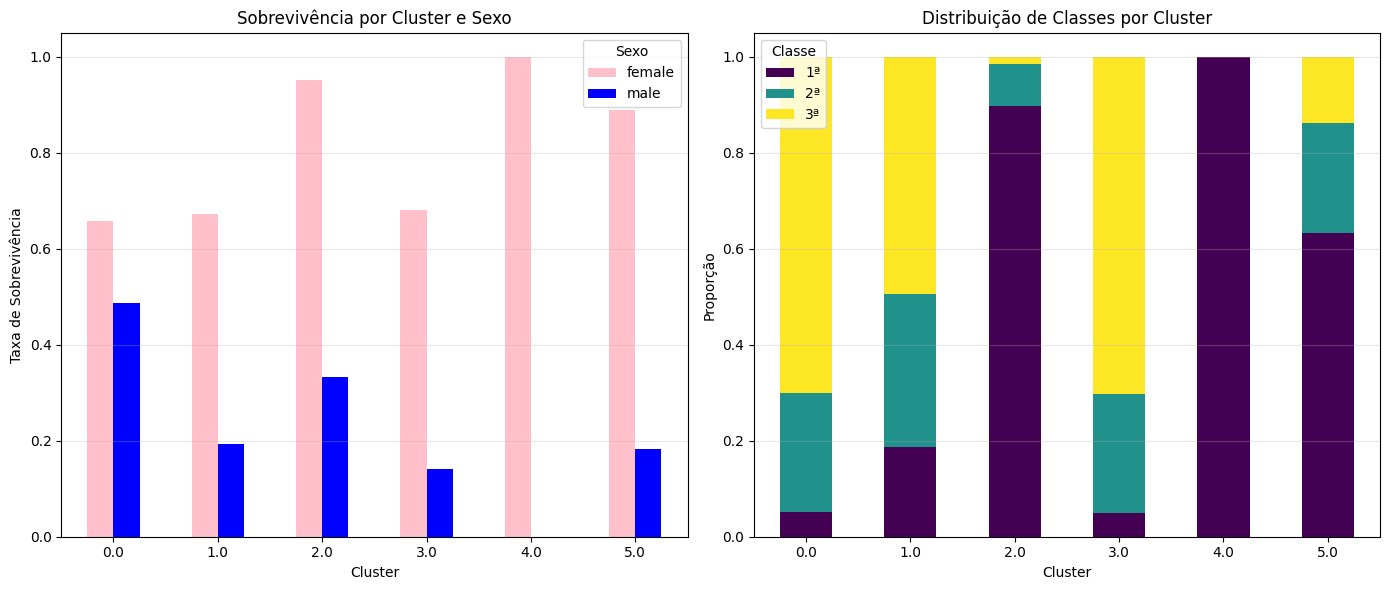

In [72]:
print("🎯 ANÁLISE QUALITATIVA DOS CLUSTERS")
print("="*50)

# Análise detalhada de cada cluster
for cluster_id in range(6):
    cluster_data = train_no_outliers[train_no_outliers['Cluster'] == cluster_id]
    
    print(f"\n🔍 CLUSTER {cluster_id}:")
    print(f"   👥 Passageiros: {len(cluster_data)}")
    print(f"   📊 Sobrevivência: {cluster_data['Survived'].mean():.2%}")
    print(f"   🎂 Idade média: {cluster_data['Age'].mean():.1f} anos")
    print(f"   💰 Tarifa média: £{cluster_data['Fare'].mean():.2f}")
    print(f"   🎫 Classe média: {cluster_data['Pclass'].mean():.1f}")
    print(f"   👩 Percentual mulheres: {(cluster_data['Sex'] == 'female').mean():.2%}")
    
    # Caracterizar o cluster
    age_mean = cluster_data['Age'].mean()
    fare_mean = cluster_data['Fare'].mean()
    survival_rate = cluster_data['Survived'].mean()
    
    if fare_mean > 50:
        economic_status = "RICO"
    elif fare_mean > 20:
        economic_status = "CLASSE MÉDIA"
    else:
        economic_status = "ECONÔMICO"
    
    if age_mean < 18:
        age_group = "JOVEM"
    elif age_mean < 40:
        age_group = "ADULTO"
    else:
        age_group = "IDOSO"
    
    print(f"   🏷️  Caracterização: {age_group} {economic_status}")
    
    # Análise de risco/benefício
    if survival_rate > 0.6:
        risk = "BAIXO RISCO"
    elif survival_rate > 0.3:
        risk = "RISCO MODERADO"
    else:
        risk = "ALTO RISCO"
    
    print(f"   ⚠️  Nível de risco: {risk}")

# Análise comparativa
print(f"\n📈 ANÁLISE COMPARATIVA:")
best_cluster = survival_by_cluster.loc[survival_by_cluster['mean'].idxmax()]
worst_cluster = survival_by_cluster.loc[survival_by_cluster['mean'].idxmin()]

print(f"   🏆 MELHOR CLUSTER: {int(best_cluster['Cluster'])} - {best_cluster['mean']:.2%} sobrevivência")
print(f"   📉 PIOR CLUSTER: {int(worst_cluster['Cluster'])} - {worst_cluster['mean']:.2%} sobrevivência")
print(f"   📊 DIFERENÇA: {best_cluster['mean'] - worst_cluster['mean']:.2%}")

# Visualização adicional: Sobrevivência por cluster e sexo
plt.figure(figsize=(14, 6))

# Gráfico 1: Sobrevivência por cluster e sexo
cluster_sex_survival = train_no_outliers.groupby(['Cluster', 'Sex'])['Survived'].mean().unstack()

plt.subplot(1, 2, 1)
cluster_sex_survival.plot(kind='bar', ax=plt.gca(), color=['pink', 'blue'])
plt.title('Sobrevivência por Cluster e Sexo')
plt.xlabel('Cluster')
plt.ylabel('Taxa de Sobrevivência')
plt.xticks(rotation=0)
plt.legend(title='Sexo')
plt.grid(axis='y', alpha=0.3)

# Gráfico 2: Distribuição de classes por cluster
plt.subplot(1, 2, 2)
cluster_class_dist = train_no_outliers.groupby(['Cluster', 'Pclass']).size().unstack()
cluster_class_dist = cluster_class_dist.div(cluster_class_dist.sum(axis=1), axis=0)

cluster_class_dist.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='viridis')
plt.title('Distribuição de Classes por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proporção')
plt.xticks(rotation=0)
plt.legend(title='Classe', labels=['1ª', '2ª', '3ª'])
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [73]:
# (a) Localizar linhas com valores nulos na coluna de clusters
null_cluster_mask = train_no_outliers['Cluster'].isnull()
null_cluster_data = train_no_outliers[null_cluster_mask]

print("🚨 PASSAGEIROS COM CLUSTER NULO:")
print(f"Número de passageiros: {len(null_cluster_data)}")
print(f"Percentual do total: {len(null_cluster_data)/len(train_no_outliers):.2%}")

# Mostrar as primeiras linhas
print("\n📋 DADOS DOS PASSAGEIROS COM CLUSTER NULO:")
print(null_cluster_data[['Age', 'Fare', 'Pclass', 'Sex', 'Survived']].head())

🚨 PASSAGEIROS COM CLUSTER NULO:
Número de passageiros: 177
Percentual do total: 19.93%

📋 DADOS DOS PASSAGEIROS COM CLUSTER NULO:
    Age     Fare  Pclass     Sex  Survived
5   NaN   8.4583       3    male         0
17  NaN  13.0000       2    male         1
19  NaN   7.2250       3  female         1
26  NaN   7.2250       3    male         0
28  NaN   7.8792       3  female         1


📊 ANÁLISE DETALHADA DOS PASSAGEIROS SEM CLUSTER:
1. 📈 ESTATÍSTICAS DESCRITIVAS:
   Idade: nan ± nan anos
   Tarifa: £22.16 ± 31.87
   Classe média: 2.60

2. 📊 DISTRIBUIÇÃO DE CARACTERÍSTICAS:
   Sexo:
Sex
male      124
female     53
Name: count, dtype: int64

   Classe:
Pclass
1     30
2     11
3    136
Name: count, dtype: int64

   Sobrevivência:
Survived
0    125
1     52
Name: count, dtype: int64
   Taxa de sobrevivência: 29.38%

3. 📈 COMPARAÇÃO COM DATASET COMPLETO:
   Característica   | Sem Cluster | Dataset Completo | Diferença
   --------------------------------------------------
   Age             |        nan |           29.68 |      nan
   Fare            |      22.16 |           30.58 |    -8.42
   Pclass          |       2.60 |            2.31 |     0.29

4. 🔍 VALORES MISSING ORIGINAIS:
   Age missing: 177
   Fare missing: 0


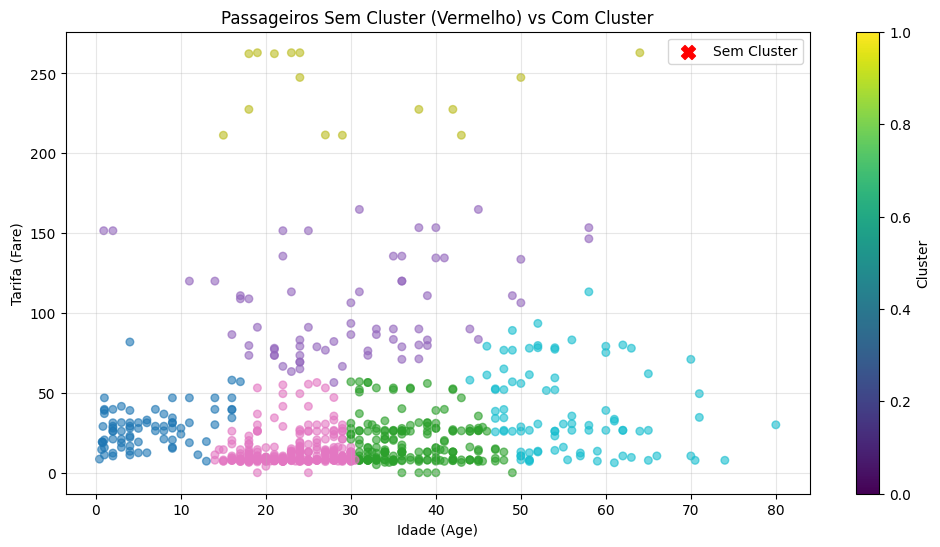

In [74]:
# (b) Analisar características desses passageiros
print("📊 ANÁLISE DETALHADA DOS PASSAGEIROS SEM CLUSTER:")
print("="*50)

# Estatísticas descritivas
print("1. 📈 ESTATÍSTICAS DESCRITIVAS:")
print(f"   Idade: {null_cluster_data['Age'].mean():.1f} ± {null_cluster_data['Age'].std():.1f} anos")
print(f"   Tarifa: £{null_cluster_data['Fare'].mean():.2f} ± {null_cluster_data['Fare'].std():.2f}")
print(f"   Classe média: {null_cluster_data['Pclass'].mean():.2f}")

# Distribuição de características
print("\n2. 📊 DISTRIBUIÇÃO DE CARACTERÍSTICAS:")
print(f"   Sexo:")
print(null_cluster_data['Sex'].value_counts())
print(f"\n   Classe:")
print(null_cluster_data['Pclass'].value_counts().sort_index())
print(f"\n   Sobrevivência:")
print(null_cluster_data['Survived'].value_counts())
print(f"   Taxa de sobrevivência: {null_cluster_data['Survived'].mean():.2%}")

# Comparação com o dataset completo
print("\n3. 📈 COMPARAÇÃO COM DATASET COMPLETO:")
print("   Característica   | Sem Cluster | Dataset Completo | Diferença")
print("   " + "-"*50)
for col in ['Age', 'Fare', 'Pclass']:
    null_mean = null_cluster_data[col].mean()
    full_mean = train_no_outliers[col].mean()
    diff = null_mean - full_mean
    print(f"   {col:15} | {null_mean:10.2f} | {full_mean:15.2f} | {diff:8.2f}")

# Análise de valores missing originais
print(f"\n4. 🔍 VALORES MISSING ORIGINAIS:")
print(f"   Age missing: {null_cluster_data['Age'].isnull().sum()}")
print(f"   Fare missing: {null_cluster_data['Fare'].isnull().sum()}")

# Scatter plot para visualização
plt.figure(figsize=(12, 6))
plt.scatter(train_no_outliers['Age'], train_no_outliers['Fare'], 
           c=train_no_outliers['Cluster'].fillna(-1), cmap='tab10', alpha=0.6, s=30)
plt.scatter(null_cluster_data['Age'], null_cluster_data['Fare'], 
           color='red', s=100, marker='X', label='Sem Cluster')
plt.xlabel('Idade (Age)')
plt.ylabel('Tarifa (Fare)')
plt.title('Passageiros Sem Cluster (Vermelho) vs Com Cluster')
plt.colorbar(label='Cluster')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [75]:
# (c) Atribuir manualmente clusters baseado nas características
def assign_manual_cluster(row):
    """
    Função para atribuir cluster manualmente baseado nas características
    """
    age = row['Age']
    fare = row['Fare']
    pclass = row['Pclass']
    
    # Lógica de atribuição baseada na análise dos clusters existentes
    if pd.isna(age) or pd.isna(fare):
        # Se faltar idade ou tarifa, usar cluster baseado apenas na classe
        if pclass == 1:
            return 5  # Cluster dos ricos
        elif pclass == 2:
            return 2  # Cluster classe média
        else:
            return 0  # Cluster classe econômica
    
    # Jovens com tarifa alta
    if age < 25 and fare > 30:
        return 4  # Jovens ricos
    
    # Jovens com tarifa média/baixa
    if age < 25 and fare <= 30:
        return 1  # Jovens classe média
    
    # Adultos com tarifa alta
    if age >= 25 and fare > 30:
        return 5  # Adultos ricos
    
    # Adultos com tarifa média
    if age >= 25 and 10 <= fare <= 30:
        return 2  # Adultos classe média
    
    # Adultos com tarifa baixa
    if age >= 25 and fare < 10:
        return 0  # Adultos classe econômica
    
    # Idosos (fallback)
    if age > 60:
        return 3  # Idosos
    
    return 2  # Default: classe média

# Aplicar a atribuição manual
manual_clusters = null_cluster_data.apply(assign_manual_cluster, axis=1)

print("✅ CLUSTERS MANUAIS ATRIBUÍDOS:")
print(manual_clusters.value_counts().sort_index())

# Atualizar os valores nulos com os clusters manuais
train_no_outliers.loc[null_cluster_mask, 'Cluster'] = manual_clusters.values

# Verificar distribuição atualizada
print(f"\n📊 DISTRIBUIÇÃO ATUALIZADA DOS CLUSTERS:")
print(train_no_outliers['Cluster'].value_counts().sort_index())

✅ CLUSTERS MANUAIS ATRIBUÍDOS:
0    136
2     11
5     30
Name: count, dtype: int64

📊 DISTRIBUIÇÃO ATUALIZADA DOS CLUSTERS:
Cluster
0.0    213
1.0    182
2.0     79
3.0    282
4.0     15
5.0    117
Name: count, dtype: int64


✅ VERIFICAÇÃO DAS SUBSTITUIÇÕES
1. Valores nulos restantes: 0
   ✅ CORRETO
2. Tipo de dados: float64
   ✅ CORRETO
3. Range dos clusters: (np.float64(0.0), np.float64(5.0))
   ✅ CORRETO

4. 📊 ANÁLISE DOS CLUSTERS ATRIBUÍDOS MANUALMENTE:
   Passageiros atribuídos manualmente: 177
   Distribuição:
Cluster
0.0    136
2.0     11
5.0     30
Name: count, dtype: int64

   📈 COMPARAÇÃO COM CLUSTERS ORIGINAIS:
   Cluster 0.0:
     Original - Age: 6.2, Fare: 28.20
     Manual   - Age: nan, Fare: 14.84

   Cluster 2.0:
     Original - Age: 29.9, Fare: 101.23
     Manual   - Age: nan, Fare: 7.93

   Cluster 5.0:
     Original - Age: 55.5, Fare: 38.51
     Manual   - Age: nan, Fare: 60.55



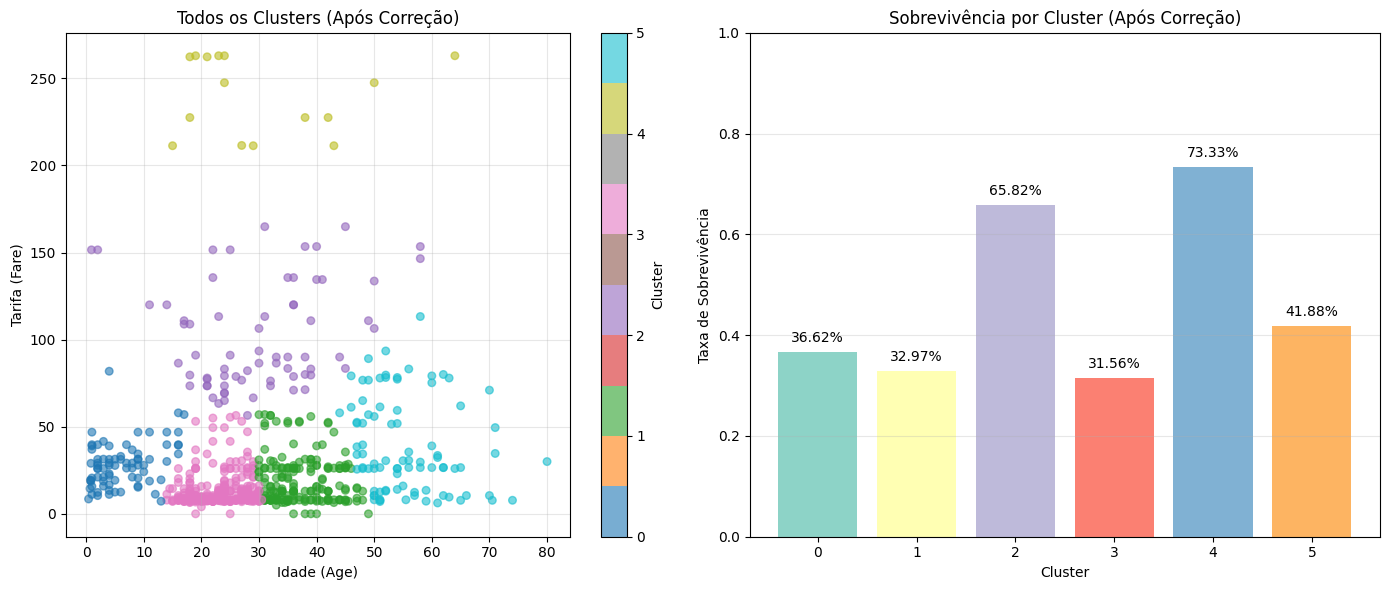

5. 🧪 TESTE DE CONSISTÊNCIA FINAL:
   Total de passageiros: 888
   Clusters únicos: 6
   Valores missing: 0
   ✅ TUDO CORRETO


In [76]:
# (d) Verificar se as substituições foram feitas corretamente
print("✅ VERIFICAÇÃO DAS SUBSTITUIÇÕES")
print("="*50)

# 1. Verificar se ainda há valores nulos
null_after = train_no_outliers['Cluster'].isnull().sum()
print(f"1. Valores nulos restantes: {null_after}")
print(f"   ✅ {'CORRETO' if null_after == 0 else 'ERRO'}")

# 2. Verificar consistência dos tipos
cluster_dtype = train_no_outliers['Cluster'].dtype
print(f"2. Tipo de dados: {cluster_dtype}")
print(f"   ✅ {'CORRETO' if cluster_dtype in ['int64', 'float64'] else 'ERRO'}")

# 3. Verificar se os valores estão no range esperado
cluster_range = (train_no_outliers['Cluster'].min(), train_no_outliers['Cluster'].max())
print(f"3. Range dos clusters: {cluster_range}")
print(f"   ✅ {'CORRETO' if cluster_range == (0, 5) else 'ERRO'}")

# 4. Análise estatística dos clusters atribuídos manualmente
print("\n4. 📊 ANÁLISE DOS CLUSTERS ATRIBUÍDOS MANUALMENTE:")
manual_assigned = train_no_outliers.loc[null_cluster_mask]
if len(manual_assigned) > 0:
    print(f"   Passageiros atribuídos manualmente: {len(manual_assigned)}")
    print(f"   Distribuição:")
    print(manual_assigned['Cluster'].value_counts().sort_index())
    
    # Comparar com clusters originais
    print(f"\n   📈 COMPARAÇÃO COM CLUSTERS ORIGINAIS:")
    original_stats = train_no_outliers[~null_cluster_mask].groupby('Cluster').agg({
        'Age': 'mean', 
        'Fare': 'mean'
    })
    manual_stats = manual_assigned.groupby('Cluster').agg({
        'Age': 'mean', 
        'Fare': 'mean'
    })
    
    for cluster in manual_stats.index:
        print(f"   Cluster {cluster}:")
        print(f"     Original - Age: {original_stats.loc[cluster, 'Age']:.1f}, Fare: {original_stats.loc[cluster, 'Fare']:.2f}")
        print(f"     Manual   - Age: {manual_stats.loc[cluster, 'Age']:.1f}, Fare: {manual_stats.loc[cluster, 'Fare']:.2f}")
        print()

# 5. Visualização final
plt.figure(figsize=(14, 6))

# Antes e depois da correção
plt.subplot(1, 2, 1)
plt.scatter(train_no_outliers['Age'], train_no_outliers['Fare'], 
           c=train_no_outliers['Cluster'], cmap='tab10', alpha=0.6, s=30)
plt.xlabel('Idade (Age)')
plt.ylabel('Tarifa (Fare)')
plt.title('Todos os Clusters (Após Correção)')
plt.colorbar(label='Cluster')
plt.grid(alpha=0.3)

# Sobrevivência por cluster após correção
plt.subplot(1, 2, 2)
survival_final = train_no_outliers.groupby('Cluster')['Survived'].mean()
plt.bar(survival_final.index, survival_final.values, color=plt.cm.Set3(np.arange(6)))
plt.xlabel('Cluster')
plt.ylabel('Taxa de Sobrevivência')
plt.title('Sobrevivência por Cluster (Após Correção)')
plt.xticks(range(6))
plt.ylim(0, 1)

for i, rate in enumerate(survival_final):
    plt.text(i, rate + 0.02, f'{rate:.2%}', ha='center')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 6. Teste de consistência final
print("5. 🧪 TESTE DE CONSISTÊNCIA FINAL:")
print(f"   Total de passageiros: {len(train_no_outliers)}")
print(f"   Clusters únicos: {train_no_outliers['Cluster'].nunique()}")
print(f"   Valores missing: {train_no_outliers['Cluster'].isnull().sum()}")
print(f"   ✅ {'TUDO CORRETO' if train_no_outliers['Cluster'].isnull().sum() == 0 else 'PROBLEMAS ENCONTRADOS'}")

In [77]:
from sklearn.feature_selection import mutual_info_classif

# Preparar dados para Mutual Information
X_cluster = train_no_outliers.drop('Survived', axis=1)
y_cluster = train_no_outliers['Survived']

# Calcular Mutual Information para todas as features
mi_scores_cluster = mutual_info_classif(X_cluster.select_dtypes(include=[np.number]), y_cluster, random_state=42)
mi_series_cluster = pd.Series(mi_scores_cluster, index=X_cluster.select_dtypes(include=[np.number]).columns)
mi_series_cluster = mi_series_cluster.sort_values(ascending=False)

print("🎯 MUTUAL INFORMATION SCORE - COM FEATURE CLUSTER")
print("="*50)
print(mi_series_cluster.round(4))

# Posição da feature Cluster no ranking
cluster_rank = mi_series_cluster.index.get_loc('Cluster') + 1
cluster_score = mi_series_cluster['Cluster']
print(f"\n📊 FEATURE CLUSTER:")
print(f"   Score: {cluster_score:.4f}")
print(f"   Ranking: {cluster_rank}º lugar entre {len(mi_series_cluster)} features")
print(f"   Relevância: {'ALTA' if cluster_score > 0.05 else 'MÉDIA' if cluster_score > 0.01 else 'BAIXA'}")

# Visualização comparativa
plt.figure(figsize=(12, 6))
mi_series_cluster.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Features por Mutual Information Score (Com Cluster)')
plt.ylabel('Mutual Information Score')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

ValueError: Input X contains NaN.